# Parameters

In [2]:
import os

parent_dir = os.path.dirname(os.getcwd()) 

# Define paths relative to the parent directory
data_path = os.path.join(parent_dir, 'data', 'processed')
model_path = os.path.join(parent_dir, 'model')

print("Data Path:", data_path)
print("Model Path:", model_path)


data_file = os.path.join(data_path, 'american_bankruptcy_processed.csv')

Data Path: /Users/eason/Documents/Project/DSI/Team Project/Company-Bankruptcy-Prediction/data/processed
Model Path: /Users/eason/Documents/Project/DSI/Team Project/Company-Bankruptcy-Prediction/model


In [3]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score, recall_score

def uniform_evaluation(model, X_test, y_test):
    # Predict on test set
    y_pred = model.predict(X_test)

    # Model evaluation
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
    print("Precision:", precision_score(y_test, y_pred, average='weighted'))
    print("Recall:", recall_score(y_test, y_pred, average='weighted'))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Data Preparation

In [4]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv(data_file)
label_encoder = LabelEncoder()
df['status_label_bin'] = label_encoder.fit_transform(df['status_label'])

print(df.columns)
print(df.head)


Index(['company_name', 'status_label', 'year', 'X1', 'X2', 'X3', 'X4', 'X5',
       'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16',
       'X17', 'X18', 'target_last', 'X8_log', 'X8_boxcox', 'X10_log',
       'X10_boxcox', 'left_censored', 'period_after_2008', 'current_ratio',
       'quick_ratio', 'debt_to_equity_ratio', 'long_term_debt_to_assets',
       'profit_margin', 'gross_margin', 'return_on_assets', 'return_on_equity',
       'asset_turnover', 'working_capital_to_assets',
       'retained_earnings_to_assets', 'ebit_to_assets',
       'market_value_to_liabilities', 'sales_to_assets', 'z_score',
       'bankruptcy', 'market_to_book', 'quick_ratio_reciprocal',
       'debt_to_equity_ratio_log', 'long_term_debt_to_assets_reciprocal',
       'working_capital_to_assets_sqrt', 'z_score_log', 'market_to_book_log',
       'return_on_equity_log', 'return_on_assets_shifted',
       'profit_margin_shifted', 'event', 'duration', 'status_label_bin'],
      dtype='ob

# Train Test Split

In [5]:
from sklearn.model_selection import train_test_split
# Select features and target
features = ['return_on_equity', 'quick_ratio', 'long_term_debt_to_assets',
            'debt_to_equity_ratio', 'sales_growth', 'market_value_to_liabilities', 'year']
#X = df[features]
# Define the feature list (X1 to X18)
features = [f'X{i}' for i in range(1, 19)]
X = df[features] 
y = df['status_label_bin']  # Target variable (1 for bankruptcy, 0 for no bankruptcy)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Advanced Sampling

In [6]:
## Advanced Sampling Techniques for Handling Class Imbalance

print("Original class distribution in training set:")
print(pd.Series(y_train).value_counts(normalize=True))

# Import various sampling techniques
from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek, SMOTEENN

# Create different resampled datasets
sampling_techniques = {}

# 1. Standard SMOTE (already used in your original code)
smote_standard = SMOTE(random_state=42)
X_resampled_smote, y_resampled_smote = smote_standard.fit_resample(X_train, y_train)
sampling_techniques['Standard SMOTE'] = (X_resampled_smote, y_resampled_smote)

# 2. More aggressive SMOTE (50% ratio)
smote_aggressive = SMOTE(random_state=42, sampling_strategy=0.5)
X_resampled_smote_agg, y_resampled_smote_agg = smote_aggressive.fit_resample(X_train, y_train)
sampling_techniques['Aggressive SMOTE (50%)'] = (X_resampled_smote_agg, y_resampled_smote_agg)

# 3. ADASYN (Adaptive Synthetic Sampling)
adasyn = ADASYN(random_state=42)
X_resampled_adasyn, y_resampled_adasyn = adasyn.fit_resample(X_train, y_train)
sampling_techniques['ADASYN'] = (X_resampled_adasyn, y_resampled_adasyn)

# 4. BorderlineSMOTE (focuses on samples near the decision boundary)
bsmote = BorderlineSMOTE(random_state=42)
X_resampled_bsmote, y_resampled_bsmote = bsmote.fit_resample(X_train, y_train)
sampling_techniques['BorderlineSMOTE'] = (X_resampled_bsmote, y_resampled_bsmote)

# 5. Combined approach: SMOTE + Tomek links (oversampling + cleaning)
smote_tomek = SMOTETomek(random_state=42)
X_resampled_smote_tomek, y_resampled_smote_tomek = smote_tomek.fit_resample(X_train, y_train)
sampling_techniques['SMOTE+Tomek'] = (X_resampled_smote_tomek, y_resampled_smote_tomek)

# 6. Combined approach: SMOTE + ENN (oversampling + cleaning)
smote_enn = SMOTEENN(random_state=42)
X_resampled_smote_enn, y_resampled_smote_enn = smote_enn.fit_resample(X_train, y_train)
sampling_techniques['SMOTE+ENN'] = (X_resampled_smote_enn, y_resampled_smote_enn)

# 7. Under-sampling approach
rus = RandomUnderSampler(random_state=42, sampling_strategy=0.5)  # Keep 50% of majority class
X_resampled_rus, y_resampled_rus = rus.fit_resample(X_train, y_train)
sampling_techniques['RandomUnderSampler'] = (X_resampled_rus, y_resampled_rus)

# Print class distribution after resampling
for name, (X_res, y_res) in sampling_techniques.items():
    print(f"\nClass distribution after {name}:")
    print(pd.Series(y_res).value_counts(normalize=True))
    print(f"Total samples: {len(y_res)}")

Original class distribution in training set:
status_label_bin
0    0.933656
1    0.066344
Name: proportion, dtype: float64

Class distribution after Standard SMOTE:
status_label_bin
0    0.5
1    0.5
Name: proportion, dtype: float64
Total samples: 117538

Class distribution after Aggressive SMOTE (50%):
status_label_bin
0    0.66667
1    0.33333
Name: proportion, dtype: float64
Total samples: 88153

Class distribution after ADASYN:
status_label_bin
0    0.50122
1    0.49878
Name: proportion, dtype: float64
Total samples: 117252

Class distribution after BorderlineSMOTE:
status_label_bin
0    0.5
1    0.5
Name: proportion, dtype: float64
Total samples: 117538

Class distribution after SMOTE+Tomek:
status_label_bin
0    0.5
1    0.5
Name: proportion, dtype: float64
Total samples: 117366

Class distribution after SMOTE+ENN:
status_label_bin
1    0.557024
0    0.442976
Name: proportion, dtype: float64
Total samples: 104017

Class distribution after RandomUnderSampler:
status_label_bin
0   

# Random Forest

In [7]:
from sklearn.ensemble import RandomForestClassifier
import joblib

rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

uniform_evaluation(rf_model, X_test, y_test)

joblib.dump(rf_model, os.path.join(model_path, 'random_forest.pkl') )

Accuracy: 0.9367096651204169
F1 Score: 0.9088839002958662
Precision: 0.9407275868197007
Recall: 0.9367096651204169

Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97     14693
           1       1.00      0.05      0.09      1044

    accuracy                           0.94     15737
   macro avg       0.97      0.52      0.53     15737
weighted avg       0.94      0.94      0.91     15737


Confusion Matrix:
 [[14693     0]
 [  996    48]]


['/Users/eason/Documents/Project/DSI/Team Project/Company-Bankruptcy-Prediction/model/random_forest.pkl']

## Random Forest with Cost-Sensitive Learning

In [8]:
# Standard Random Forest (as in your original code)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)
print("\n=== Standard Random Forest (balanced class weight) ===")
rf_pred = uniform_evaluation(rf_model, X_test, y_test)

# Random Forest with custom class weights
rf_model_custom = RandomForestClassifier(
    n_estimators=100, 
    random_state=42, 
    class_weight={0:1, 1:15}  # Manually set higher weight for minority class
)
rf_model_custom.fit(X_train, y_train)
print("\n=== Random Forest with Custom Class Weights (0:1, 1:15) ===")
rf_custom_pred = uniform_evaluation(rf_model_custom, X_test, y_test)

# Random Forest with even more aggressive class weights
rf_model_aggressive = RandomForestClassifier(
    n_estimators=100, 
    random_state=42, 
    class_weight={0:1, 1:25}  # Very high weight for minority class
)
rf_model_aggressive.fit(X_train, y_train)
print("\n=== Random Forest with Aggressive Class Weights (0:1, 1:25) ===")
rf_aggressive_pred = uniform_evaluation(rf_model_aggressive, X_test, y_test)

# Save the models
joblib.dump(rf_model, os.path.join(model_path, 'random_forest_balanced.pkl'))
joblib.dump(rf_model_custom, os.path.join(model_path, 'random_forest_custom_weights.pkl'))
joblib.dump(rf_model_aggressive, os.path.join(model_path, 'random_forest_aggressive_weights.pkl'))


=== Standard Random Forest (balanced class weight) ===
Accuracy: 0.9367096651204169
F1 Score: 0.9088839002958662
Precision: 0.9407275868197007
Recall: 0.9367096651204169

Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97     14693
           1       1.00      0.05      0.09      1044

    accuracy                           0.94     15737
   macro avg       0.97      0.52      0.53     15737
weighted avg       0.94      0.94      0.91     15737


Confusion Matrix:
 [[14693     0]
 [  996    48]]

=== Random Forest with Custom Class Weights (0:1, 1:15) ===
Accuracy: 0.9366461206074855
F1 Score: 0.9089553353648336
Precision: 0.938174185491215
Recall: 0.9366461206074855

Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97     14693
           1       0.96      0.05      0.09      1044

    accuracy                           0.94     15737
   macro

['/Users/eason/Documents/Project/DSI/Team Project/Company-Bankruptcy-Prediction/model/random_forest_aggressive_weights.pkl']


=== Random Forest with Standard SMOTE ===
Accuracy: 0.9231
Precision: 0.4262
Recall: 0.4588
F1 Score: 0.4419


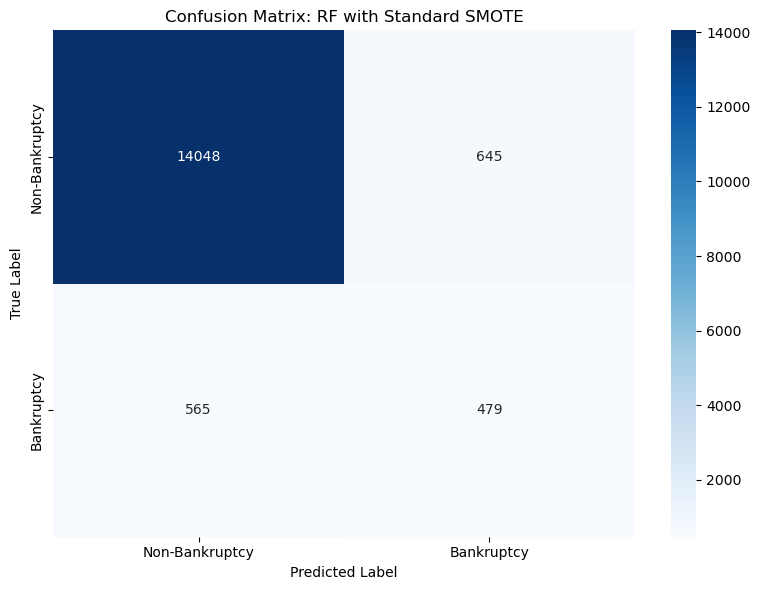


=== Random Forest with Aggressive SMOTE (50%) ===
Accuracy: 0.9397
Precision: 0.5708
Recall: 0.3669
F1 Score: 0.4466


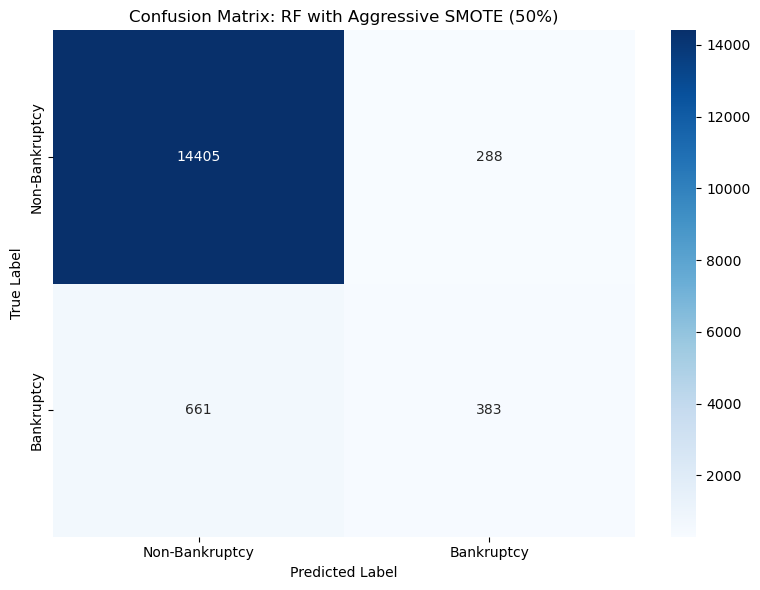


=== Random Forest with ADASYN ===
Accuracy: 0.9185
Precision: 0.4040
Recall: 0.4799
F1 Score: 0.4387


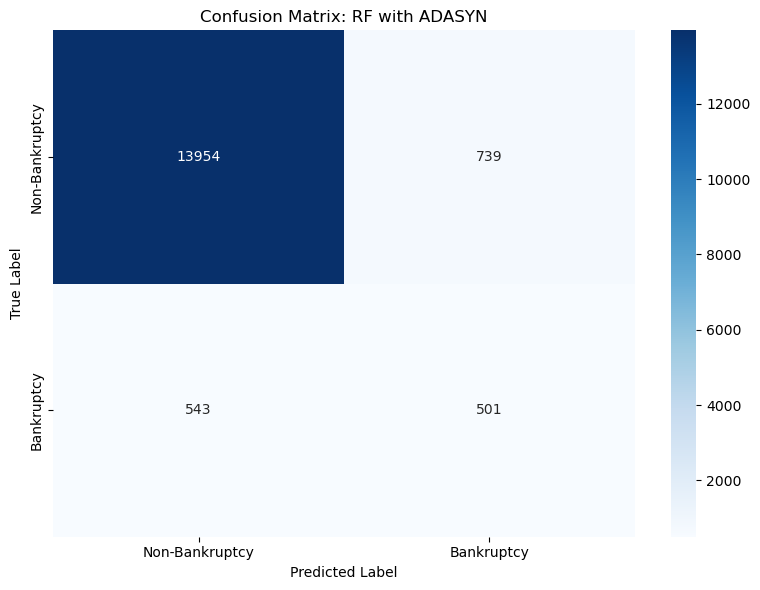


=== Random Forest with BorderlineSMOTE ===
Accuracy: 0.9302
Precision: 0.4706
Recall: 0.4138
F1 Score: 0.4404


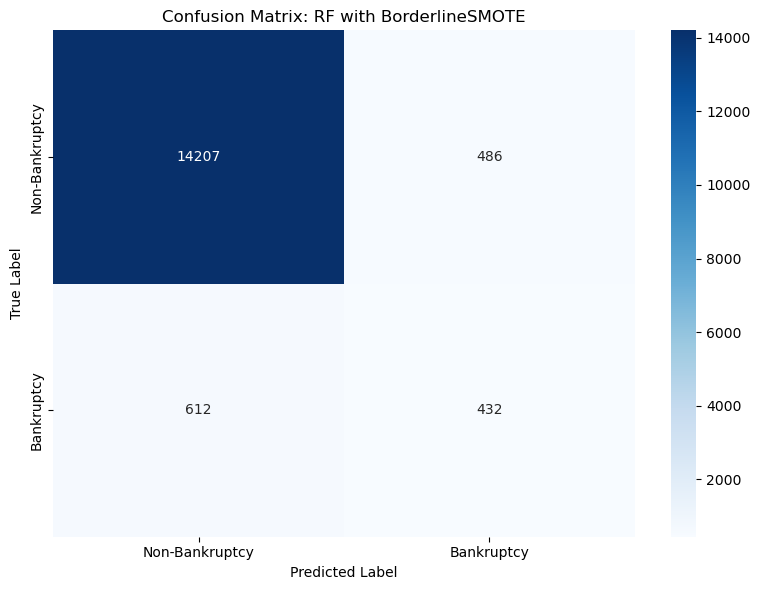


=== Random Forest with SMOTE+Tomek ===
Accuracy: 0.9223
Precision: 0.4217
Recall: 0.4588
F1 Score: 0.4394


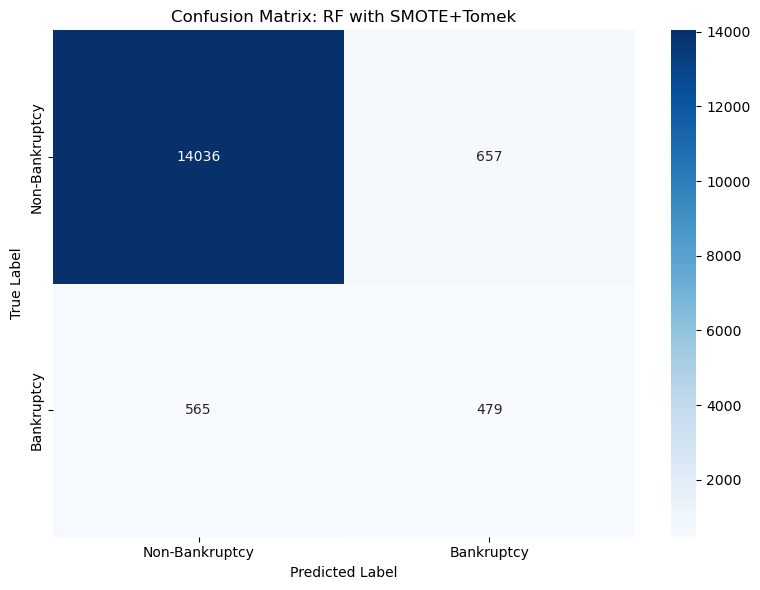


=== Random Forest with SMOTE+ENN ===
Accuracy: 0.8812
Precision: 0.2941
Recall: 0.5651
F1 Score: 0.3869


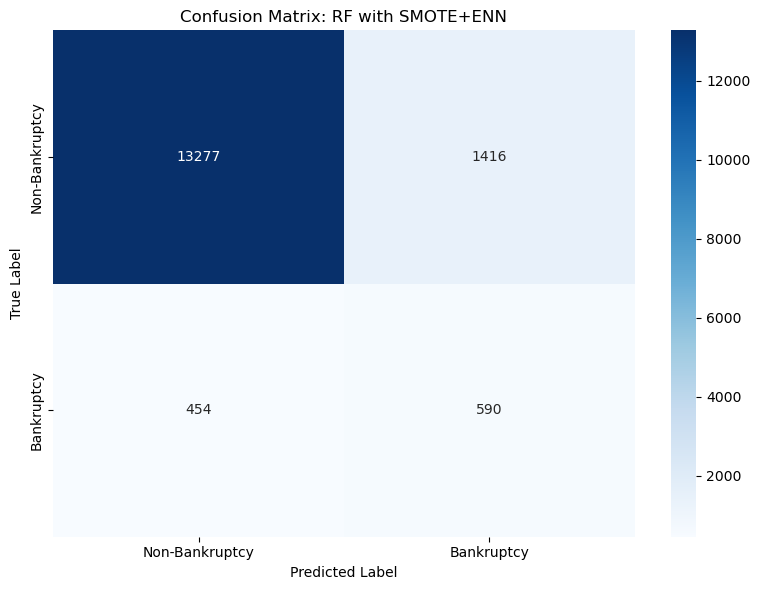


=== Random Forest with RandomUnderSampler ===
Accuracy: 0.8824
Precision: 0.2882
Recall: 0.5259
F1 Score: 0.3723


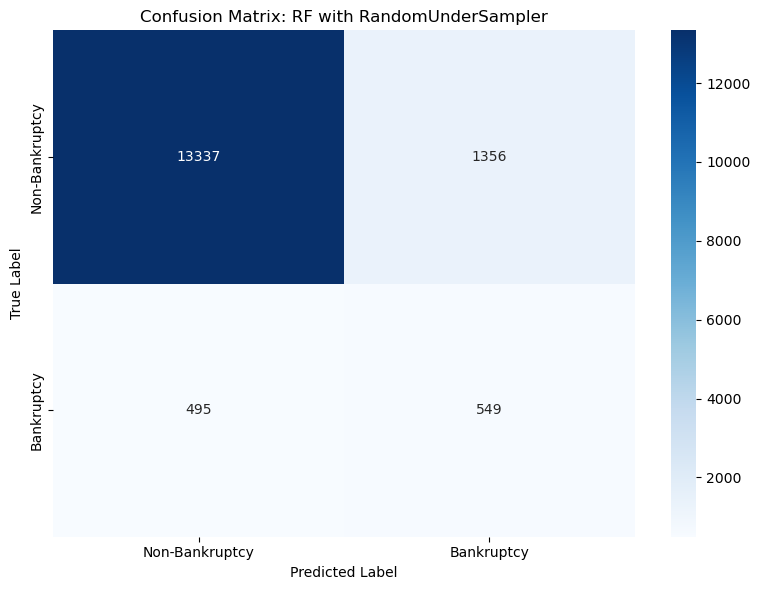


Combined Results Summary (sorted by F1 Score):
                 Sampling          Model  Accuracy  Precision    Recall  \
1  Aggressive SMOTE (50%)  Random Forest  0.939696   0.570790  0.366858   
0          Standard SMOTE  Random Forest  0.923111   0.426157  0.458812   
3         BorderlineSMOTE  Random Forest  0.930228   0.470588  0.413793   
4             SMOTE+Tomek  Random Forest  0.922349   0.421655  0.458812   
2                  ADASYN  Random Forest  0.918536   0.404032  0.479885   
5               SMOTE+ENN  Random Forest  0.881172   0.294118  0.565134   
6      RandomUnderSampler  Random Forest  0.882379   0.288189  0.525862   

   F1 Score  
1  0.446647  
0  0.441882  
3  0.440367  
4  0.439450  
2  0.438704  
5  0.386885  
6  0.372330  


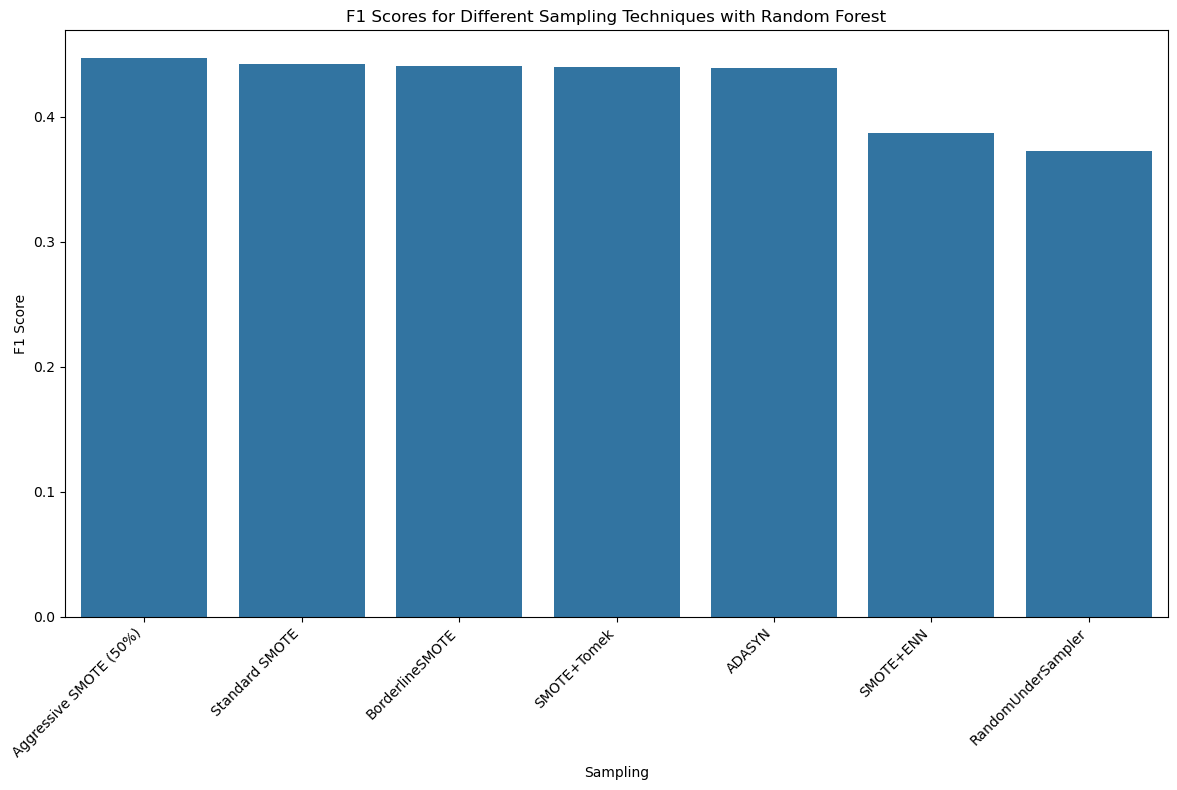


Best combination: Aggressive SMOTE (50%) with Random Forest
F1 Score: 0.4466
Precision: 0.5708
Recall: 0.3669


In [9]:
## Combining Sampling Techniques with Models
import matplotlib.pyplot as plt
import seaborn as sns
# Dictionary to store results
combined_results = []

# We'll use Random Forest as our base model and try different sampling techniques
for sampling_name, (X_res, y_res) in sampling_techniques.items():
    # Train Random Forest on resampled data
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_res, y_res)
    
    # Evaluate
    y_pred = rf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Store results
    combined_results.append({
        'Sampling': sampling_name,
        'Model': 'Random Forest',
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })
    
    print(f"\n=== Random Forest with {sampling_name} ===")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    
    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Non-Bankruptcy', 'Bankruptcy'],
                yticklabels=['Non-Bankruptcy', 'Bankruptcy'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix: RF with {sampling_name}')
    plt.tight_layout()
    plt.savefig(f'../results/figures/RF_{sampling_name.replace(" ", "_")}_cm.png', dpi=300, bbox_inches='tight')
    plt.show()

# Create a DataFrame for easy comparison
combined_results_df = pd.DataFrame(combined_results)
print("\nCombined Results Summary (sorted by F1 Score):")
print(combined_results_df.sort_values('F1 Score', ascending=False))

# Visualize the results
plt.figure(figsize=(12, 8))
sns.barplot(x='Sampling', y='F1 Score', data=combined_results_df.sort_values('F1 Score', ascending=False))
plt.xticks(rotation=45, ha='right')
plt.title('F1 Scores for Different Sampling Techniques with Random Forest')
plt.tight_layout()
plt.savefig('../results/figures/sampling_techniques_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# Find the best combination
best_combination = combined_results_df.sort_values('F1 Score', ascending=False).iloc[0]
print(f"\nBest combination: {best_combination['Sampling']} with Random Forest")
print(f"F1 Score: {best_combination['F1 Score']:.4f}")
print(f"Precision: {best_combination['Precision']:.4f}")
print(f"Recall: {best_combination['Recall']:.4f}")

# XGBoost

In [10]:
from xgboost import XGBClassifier

# Calculate scale_pos_weight
scale_pos_weight = sum(y_train == 0) / sum(y_train == 1)

xgb_model = XGBClassifier(n_estimators=100, random_state=42, scale_pos_weight=scale_pos_weight, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

uniform_evaluation(xgb_model, X_test, y_test)

joblib.dump(xgb_model, os.path.join(model_path, 'xgboost.pkl') )


/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:45:04] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.8418377073139734
F1 Score: 0.8716380702435294
Precision: 0.9172047865755841
Recall: 0.8418377073139734

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.86      0.91     14693
           1       0.23      0.58      0.33      1044

    accuracy                           0.84     15737
   macro avg       0.60      0.72      0.62     15737
weighted avg       0.92      0.84      0.87     15737


Confusion Matrix:
 [[12646  2047]
 [  442   602]]


['/Users/eason/Documents/Project/DSI/Team Project/Company-Bankruptcy-Prediction/model/xgboost.pkl']

In [11]:
## XGBoost with Best Sampling Technique
from xgboost import XGBClassifier
# Get the best sampling technique name
best_sampling = best_combination['Sampling']
X_best, y_best = sampling_techniques[best_sampling]

# Train XGBoost with the best sampling technique
xgb_best = XGBClassifier(
    n_estimators=100, 
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)
xgb_best.fit(X_best, y_best)

# Evaluate
print(f"\n=== XGBoost with {best_sampling} ===")
xgb_best_pred = uniform_evaluation(xgb_best, X_test, y_test)

# Save the model
joblib.dump(xgb_best, os.path.join(model_path, f'xgboost_with_{best_sampling.replace(" ", "_")}.pkl'))


/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:45:05] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



=== XGBoost with Aggressive SMOTE (50%) ===
Accuracy: 0.8916566054521192
F1 Score: 0.9019033491043847
Precision: 0.9149117388186857
Recall: 0.8916566054521192

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.92      0.94     14693
           1       0.29      0.45      0.35      1044

    accuracy                           0.89     15737
   macro avg       0.63      0.68      0.65     15737
weighted avg       0.91      0.89      0.90     15737


Confusion Matrix:
 [[13566  1127]
 [  578   466]]


['/Users/eason/Documents/Project/DSI/Team Project/Company-Bankruptcy-Prediction/model/xgboost_with_Aggressive_SMOTE_(50%).pkl']

# SVM

In [12]:
# from sklearn.svm import LinearSVC

# svm_model = LinearSVC(random_state=42, class_weight='balanced', max_iter=5000)
# svm_model.fit(X_train, y_train)

# uniform_evaluation(svm_model, X_test, y_test)


# joblib.dump(svm_model, os.path.join(model_path, 'svm.pkl') )

# NN Based Model

In [13]:
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE

nn_model = MLPClassifier(hidden_layer_sizes=(100, 50), 
                         max_iter=500, 
                         solver='adam', 
                         activation='relu',
                         random_state=42)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

nn_model.fit(X_resampled, y_resampled)

uniform_evaluation(nn_model, X_test, y_test)

joblib.dump(nn_model, os.path.join(model_path, 'mlp.pkl'))

Accuracy: 0.803202643451738
F1 Score: 0.8464302097516012
Precision: 0.9164846646949695
Recall: 0.803202643451738

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.82      0.89     14693
           1       0.19      0.62      0.29      1044

    accuracy                           0.80     15737
   macro avg       0.58      0.72      0.59     15737
weighted avg       0.92      0.80      0.85     15737


Confusion Matrix:
 [[11994  2699]
 [  398   646]]


['/Users/eason/Documents/Project/DSI/Team Project/Company-Bankruptcy-Prediction/model/mlp.pkl']

In [14]:
# NN with Best Sampling Technique
from sklearn.neural_network import MLPClassifier
# Train NN with the best sampling technique
X_best, y_best = sampling_techniques[best_sampling]
nn_best = MLPClassifier(
    hidden_layer_sizes=(100, 50), 
    max_iter=500, 
    solver='adam', 
    activation='relu'
)
nn_best.fit(X_best, y_best)
# Evaluate
print(f"\n=== NN with {best_sampling} ===")
nn_best_pred = uniform_evaluation(nn_best, X_test, y_test)
# Save the model
joblib.dump(nn_best, os.path.join(model_path, f'nn_with_{best_sampling.replace(" ", "_")}.pkl'))


=== NN with Aggressive SMOTE (50%) ===
Accuracy: 0.8291923492406431
F1 Score: 0.8616763443328527
Precision: 0.9088696673887003
Recall: 0.8291923492406431

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.85      0.90     14693
           1       0.19      0.50      0.28      1044

    accuracy                           0.83     15737
   macro avg       0.58      0.67      0.59     15737
weighted avg       0.91      0.83      0.86     15737


Confusion Matrix:
 [[12531  2162]
 [  526   518]]


['/Users/eason/Documents/Project/DSI/Team Project/Company-Bankruptcy-Prediction/model/nn_with_Aggressive_SMOTE_(50%).pkl']

# Voting Classifier for Model Ensemble (hard voting: majority rule)

In [15]:
from sklearn.ensemble import VotingClassifier

voting_hard = VotingClassifier(
    estimators=[('rf', rf_model), 
                ('xgb', xgb_model), 
                # ('svm', svm_model), 
                ('nn', nn_model)],
    voting='hard'  # Majority voting
)

voting_hard.fit(X_train, y_train)

uniform_evaluation(voting_hard, X_test, y_test)

joblib.dump(voting_hard, os.path.join(model_path, 'voting_hard.pkl'))

/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:46:48] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9372815657367987
F1 Score: 0.910713704019761
Precision: 0.9365390936572807
Recall: 0.9372815657367987

Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97     14693
           1       0.93      0.06      0.11      1044

    accuracy                           0.94     15737
   macro avg       0.93      0.53      0.54     15737
weighted avg       0.94      0.94      0.91     15737


Confusion Matrix:
 [[14688     5]
 [  982    62]]


['/Users/eason/Documents/Project/DSI/Team Project/Company-Bankruptcy-Prediction/model/voting_hard.pkl']

# Soft Voting (Weighted Average of Probabilities)

In [16]:

voting_soft = VotingClassifier(
    estimators=[('rf', rf_model), 
                ('xgb', xgb_model), 
                # ('svm', svm_model), 
                ('nn', nn_model)],
    voting='soft'  # Soft voting (average probabilities)
)

voting_soft.fit(X_train, y_train)

uniform_evaluation(voting_soft, X_test, y_test)

joblib.dump(voting_soft, os.path.join(model_path, 'voting_soft.pkl'))

/opt/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [23:47:23] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9381711889178369
F1 Score: 0.9127892486152137
Precision: 0.9375290276767413
Recall: 0.9381711889178369

Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97     14693
           1       0.93      0.07      0.14      1044

    accuracy                           0.94     15737
   macro avg       0.93      0.54      0.55     15737
weighted avg       0.94      0.94      0.91     15737


Confusion Matrix:
 [[14687     6]
 [  967    77]]


['/Users/eason/Documents/Project/DSI/Team Project/Company-Bankruptcy-Prediction/model/voting_soft.pkl']

# Model Evaluation Section

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score, roc_curve, roc_auc_score

def evaluate_model_with_curves(model, X_test, y_test, model_name):
    """
    Comprehensive model evaluation function that generates:
    1. Precision-Recall curve
    2. ROC curve
    3. Precision and Recall vs Threshold plot
    
    Parameters:
    -----------
    model : trained model with predict_proba method
    X_test : test features
    y_test : test labels
    model_name : string name of the model for plot labels
    """
    # Get probability predictions
    y_pred_prob = model.predict_proba(X_test)[:,1]
    
    # Calculate metrics
    average_precision = average_precision_score(y_test, y_pred_prob)
    auc_score = roc_auc_score(y_test, y_pred_prob)
    
    # 1. Precision-Recall Curve
    precision, recall, pr_thresholds = precision_recall_curve(y_test, y_pred_prob)
    
    plt.figure(figsize=(10, 8))
    
    # Plot the precision-recall curve
    plt.plot(recall, precision, label=f'{model_name} (AP = {average_precision:.3f})')
    
    # Plot the baseline (proportion of positive class)
    baseline = np.sum(y_test) / len(y_test)
    plt.axhline(y=baseline, color='r', linestyle='--', 
                label=f'Baseline (No Skill) = {baseline:.3f}')
    
    # Add labels and title
    plt.xlabel('Recall', fontsize=12)
    plt.ylabel('Precision', fontsize=12)
    plt.title(f'Precision-Recall Curve for {model_name}', fontsize=14)
    
    # Set axis limits
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    
    # Add legend and grid
    plt.legend(loc='best', fontsize=10)
    plt.grid(alpha=0.3)
    plt.savefig(f'../results/figures/{model_name.replace(" ", "_")}_PR_curve.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # 2. ROC Curve
    fpr, tpr, roc_thresholds = roc_curve(y_test, y_pred_prob)
    
    plt.figure(figsize=(10, 8))
    plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.5)')
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.3f})')
    
    # Add labels and title
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.title(f'ROC Curve for {model_name}', fontsize=14)
    
    # Add legend and grid
    plt.legend(loc='best', fontsize=10)
    plt.grid(alpha=0.3)
    
    # Set axis limits
    plt.xlim([0, 1])
    plt.ylim([0, 1.05])
    plt.savefig(f'../results/figures/{model_name.replace(" ", "_")}_ROC_curve.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # 3. Precision and Recall vs Threshold
    plt.figure(figsize=(10, 8))
    
    plt.plot(pr_thresholds, precision[:-1], 'b--', linewidth=2, label='Precision')
    plt.plot(pr_thresholds, recall[:-1], 'g-', linewidth=2, label='Recall')
    
    # Find the threshold where precision and recall are closest
    closest_idx = np.argmin(np.abs(precision[:-1] - recall[:-1]))
    optimal_threshold = pr_thresholds[closest_idx]
    
    plt.axvline(x=optimal_threshold, color='r', linestyle=':', 
                label=f'Balanced Threshold = {optimal_threshold:.3f}')
    
    plt.xlabel('Threshold', fontsize=12)
    plt.ylabel('Score', fontsize=12)
    plt.title(f'Precision and Recall vs. Threshold for {model_name}', fontsize=14)
    plt.legend(fontsize=10)
    plt.grid(alpha=0.3)
    plt.savefig(f'../results/figures/{model_name.replace(" ", "_")}_threshold_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Return key metrics and optimal threshold
    return {
        'model_name': model_name,
        'average_precision': average_precision,
        'auc_score': auc_score,
        'optimal_threshold': optimal_threshold
    }

## Create a directory for saving figures if it doesn't exist

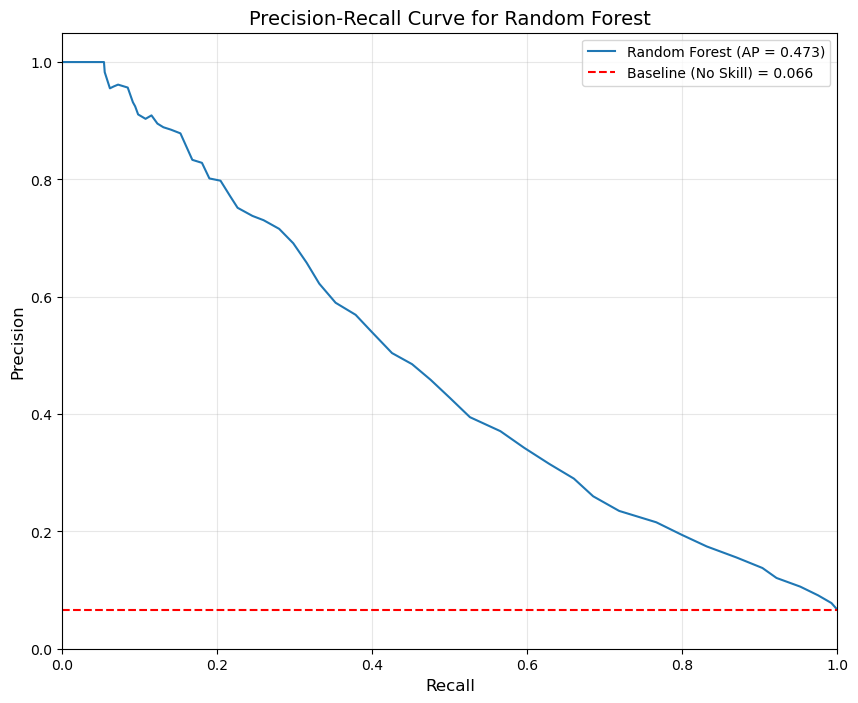

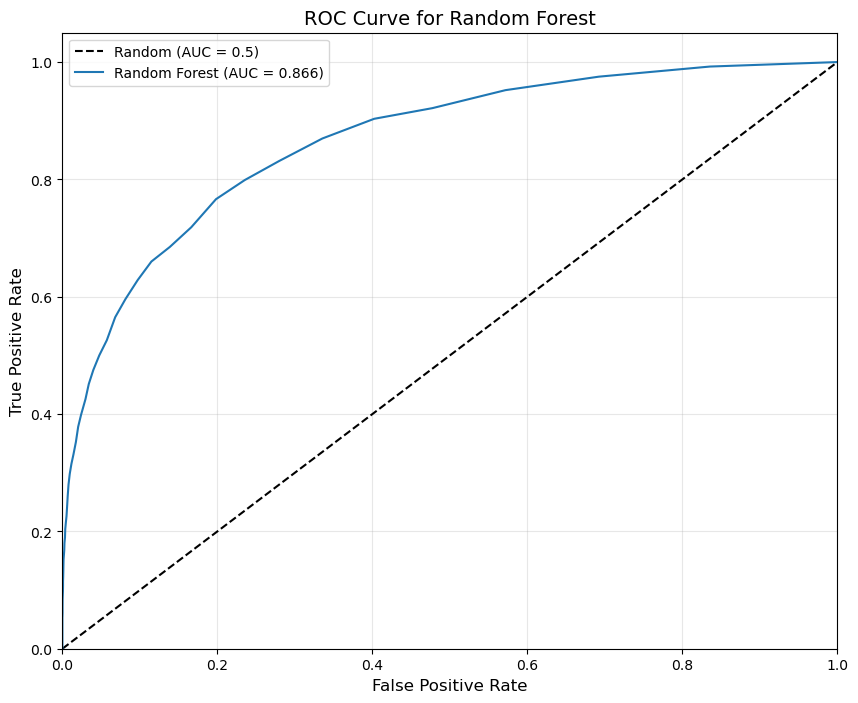

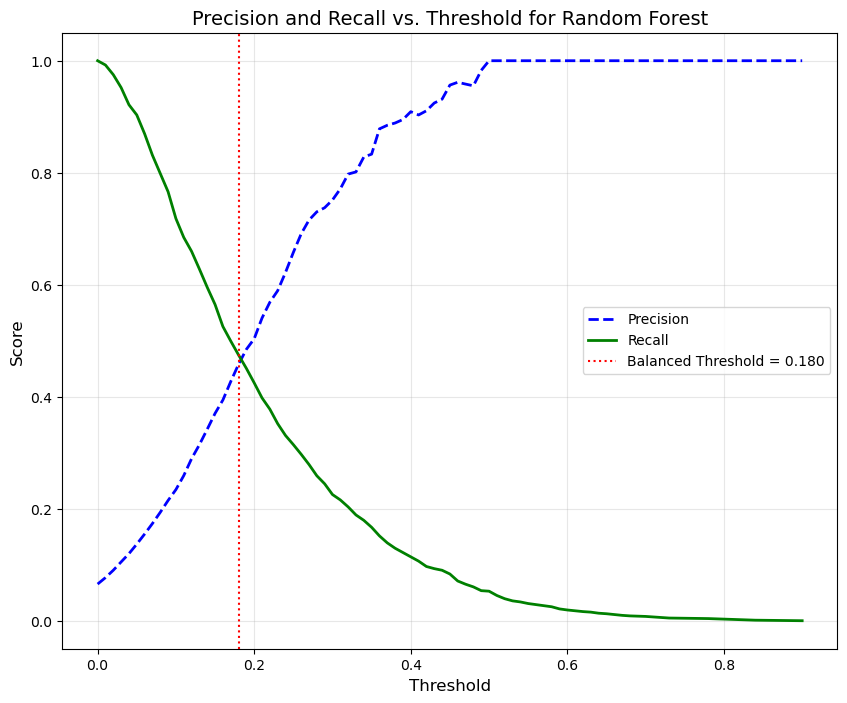

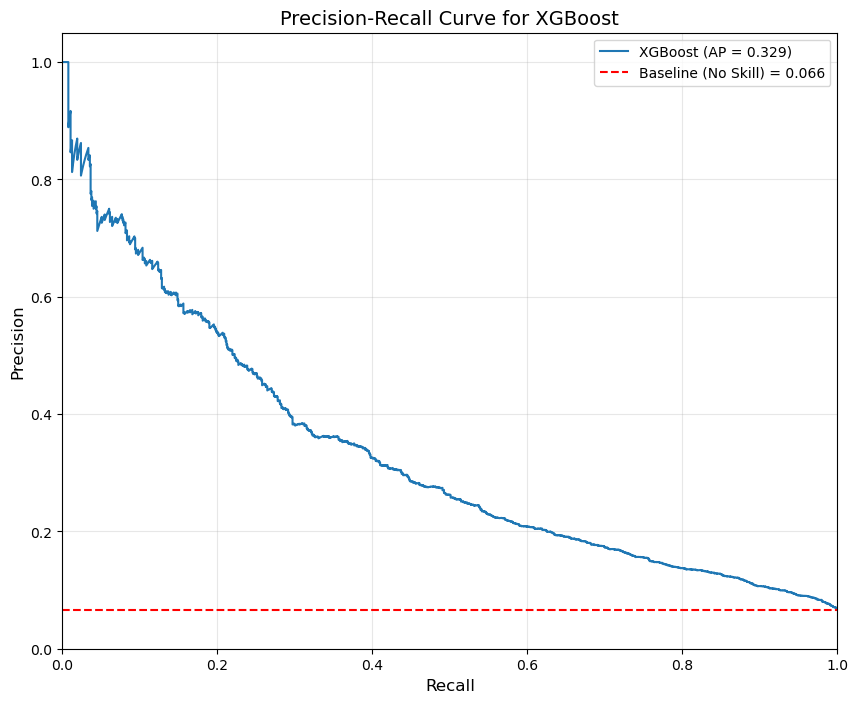

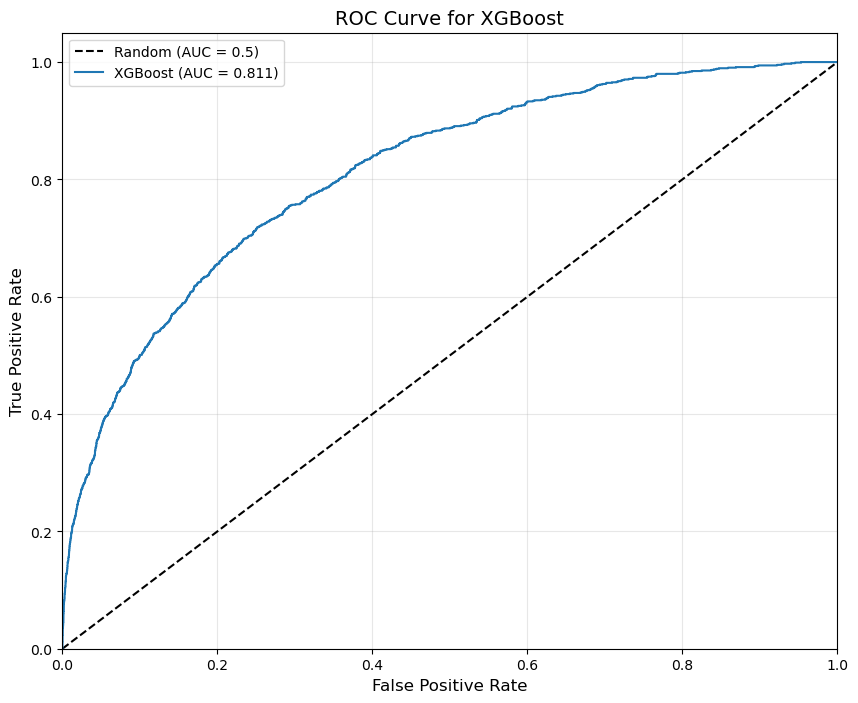

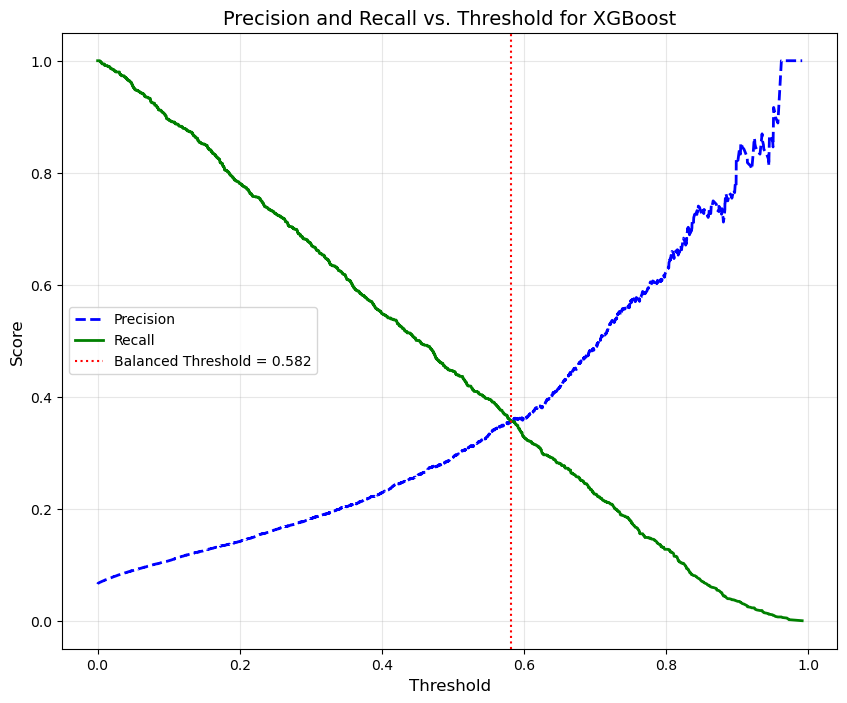

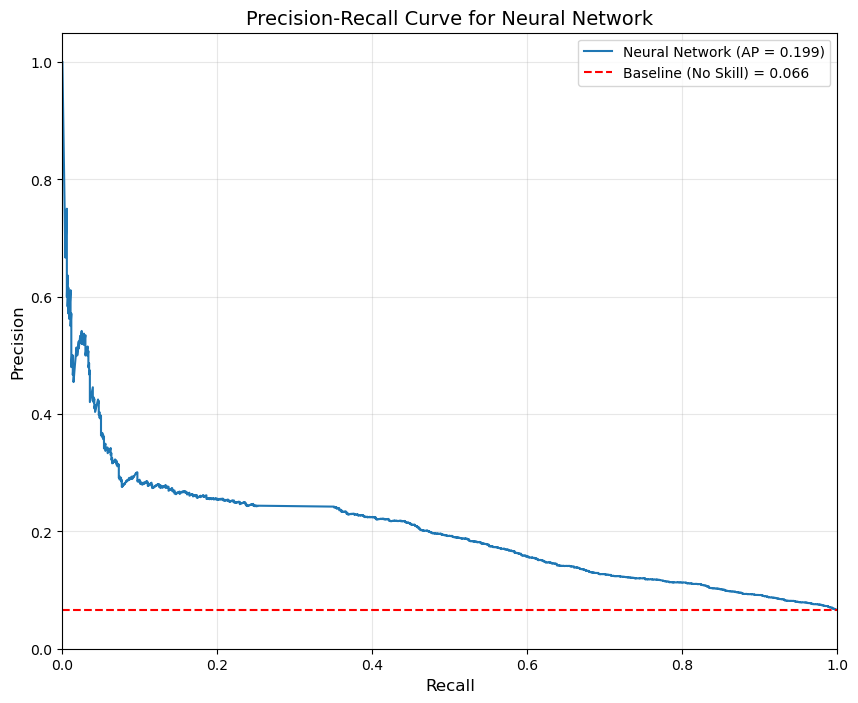

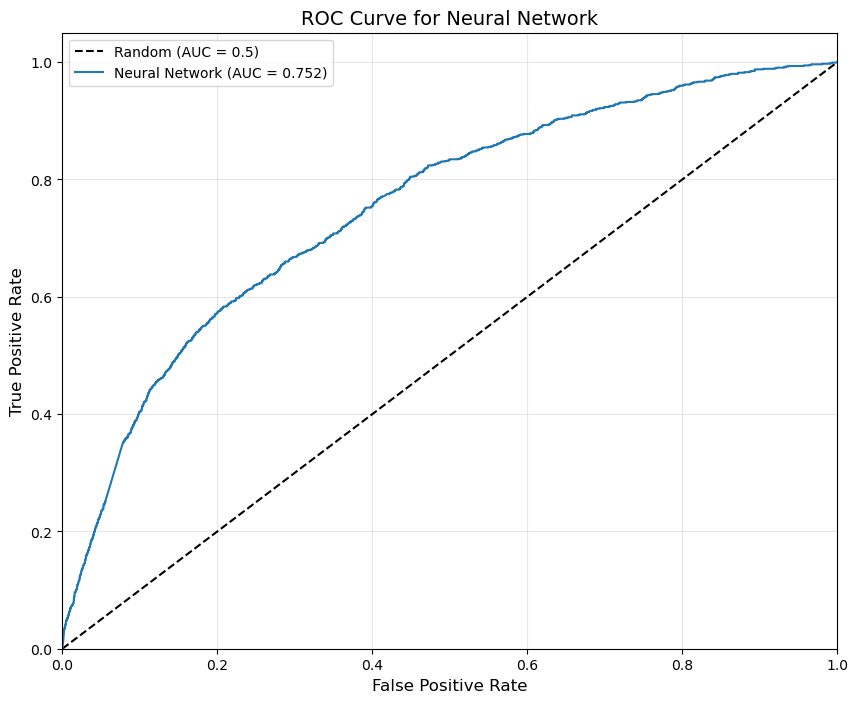

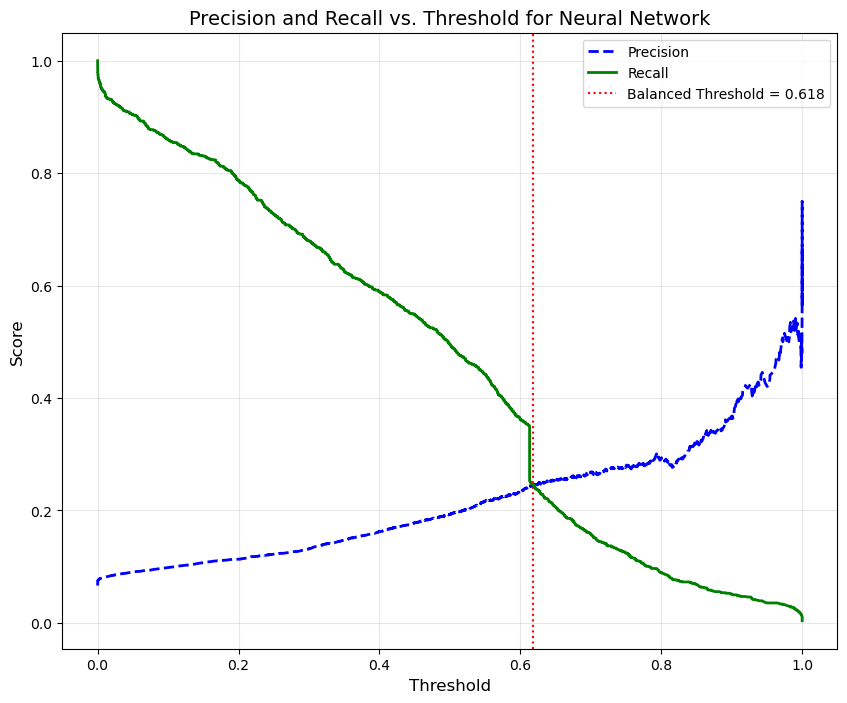

In [18]:
import os
os.makedirs('../results/figures', exist_ok=True)

# Evaluate all models and collect results
evaluation_results = []

# Evaluate Random Forest
rf_results = evaluate_model_with_curves(rf_model, X_test, y_test, "Random Forest")
evaluation_results.append(rf_results)

# Evaluate XGBoost
xgb_results = evaluate_model_with_curves(xgb_best, X_test, y_test, "XGBoost")
evaluation_results.append(xgb_results)

# Evaluate Neural Network
nn_results = evaluate_model_with_curves(nn_best, X_test, y_test, "Neural Network")
evaluation_results.append(nn_results)


## Create a DataFrame to compare all models

Model Evaluation Summary:
       model_name  average_precision  auc_score  optimal_threshold
0   Random Forest           0.473247   0.866232           0.180000
1         XGBoost           0.329302   0.811394           0.582372
2  Neural Network           0.199277   0.752080           0.617823


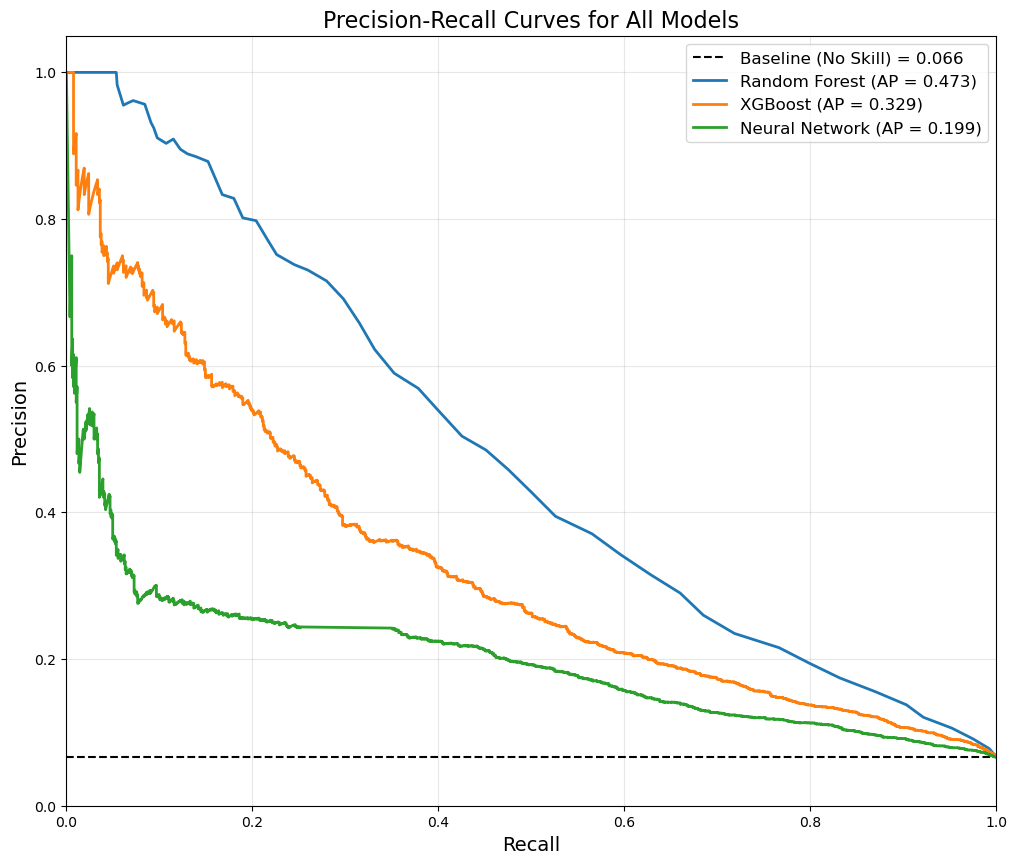

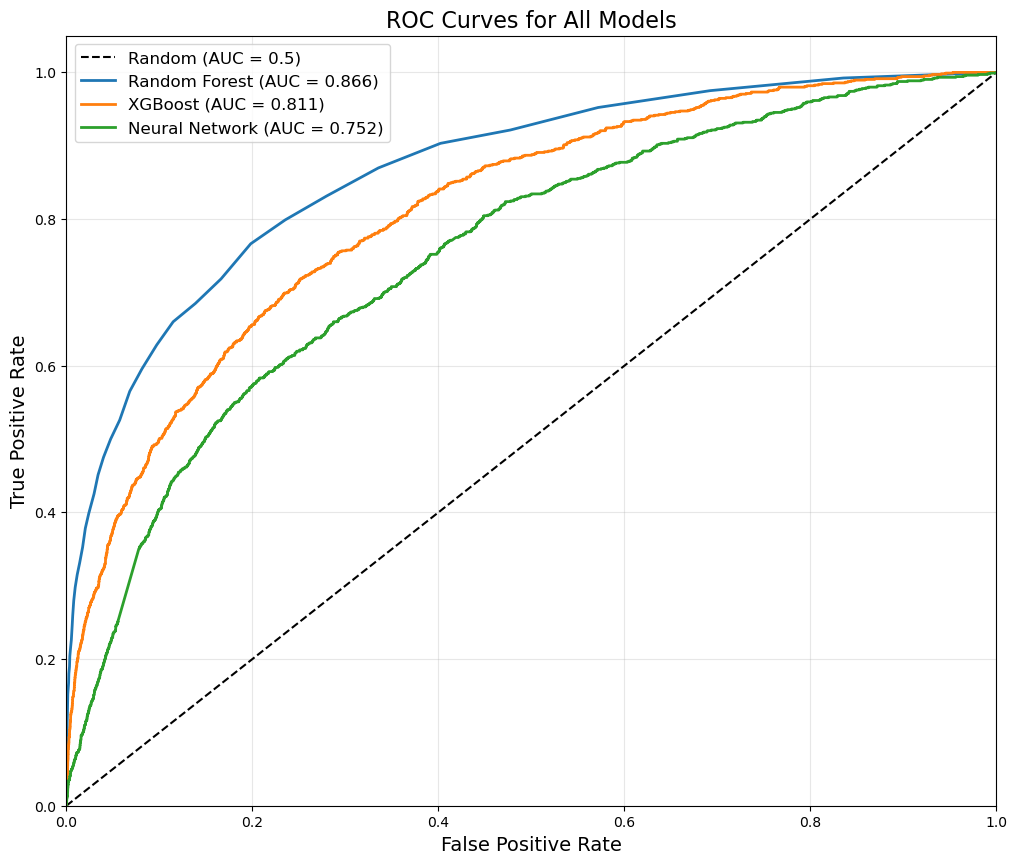

In [19]:
import pandas as pd
results_df = pd.DataFrame(evaluation_results)
print("Model Evaluation Summary:")
print(results_df.sort_values('average_precision', ascending=False))

# Plot comparison of all models on a single PR curve
plt.figure(figsize=(12, 10))

# Get baseline
baseline = np.sum(y_test) / len(y_test)
plt.axhline(y=baseline, color='k', linestyle='--', 
            label=f'Baseline (No Skill) = {baseline:.3f}')

# Add each model to the plot
for model_name, model in [
    ("Random Forest", rf_model),
    ("XGBoost", xgb_best),
    ("Neural Network", nn_best),
]:
    y_pred_prob = model.predict_proba(X_test)[:,1]
    precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
    ap = average_precision_score(y_test, y_pred_prob)
    plt.plot(recall, precision, linewidth=2, label=f'{model_name} (AP = {ap:.3f})')

plt.xlabel('Recall', fontsize=14)
plt.ylabel('Precision', fontsize=14)
plt.title('Precision-Recall Curves for All Models', fontsize=16)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.legend(loc='best', fontsize=12)
plt.grid(alpha=0.3)
plt.savefig('../results/figures/all_models_PR_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# Plot comparison of all models on a single ROC curve
plt.figure(figsize=(12, 10))

# Add diagonal line for random classifier
plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.5)')

# Add each model to the plot
for model_name, model in [
    ("Random Forest", rf_model),
    ("XGBoost", xgb_best),
    ("Neural Network", nn_best),
]:
    y_pred_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    auc = roc_auc_score(y_test, y_pred_prob)
    plt.plot(fpr, tpr, linewidth=2, label=f'{model_name} (AUC = {auc:.3f})')

plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curves for All Models', fontsize=16)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.legend(loc='best', fontsize=12)
plt.grid(alpha=0.3)
plt.savefig('../results/figures/all_models_ROC_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# Analyze the best model (assuming it's the random forest model based on previous results)
best_model = rf_model
best_model_name = "Random Forest"

# Get optimal threshold from results
optimal_threshold = next(item['optimal_threshold'] for item in evaluation_results if item['model_name'] == best_model_name)

# Apply optimal threshold to get predictions
y_pred_prob = best_model.predict_proba(X_test)[:,1]
y_pred_optimal = (y_pred_prob >= optimal_threshold).astype(int)



=== SHAP Analysis for Best Model ===


<Figure size 1200x1000 with 0 Axes>

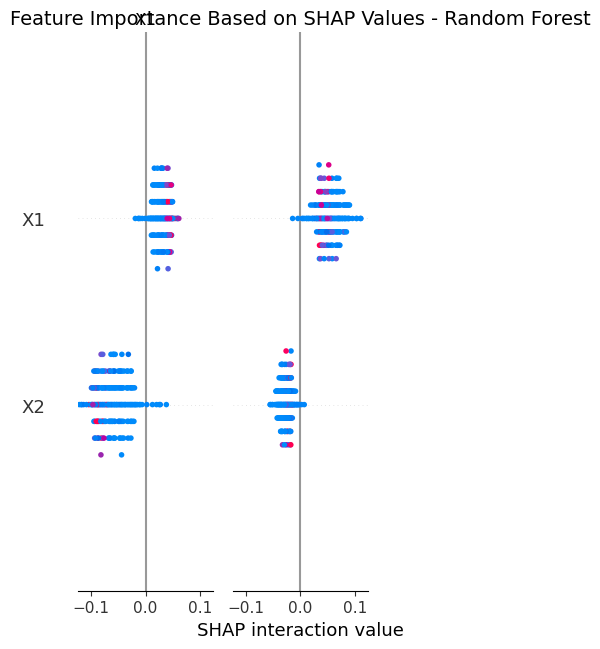

<Figure size 1400x1200 with 0 Axes>

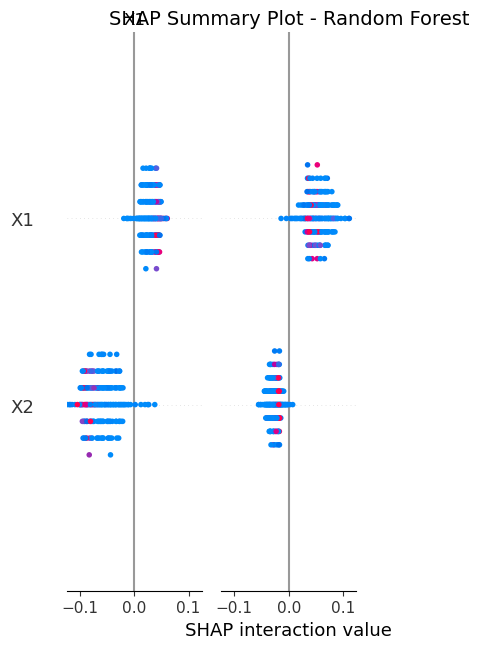

Shape of feature_importance: (18, 2)
Number of columns in X_test_sample: 18
Creating dependence plot for feature: X15 (index: 14)
Error creating dependence plot for X15: x and y must be the same size
Shape of X_test_sample: (200, 18)
Shape of shap_values_to_plot: (200, 18, 2)
Feature index: 14
Alternative approach also failed: The shap_values parameter must be a shap.Explanation object!
Creating dependence plot for feature: X16 (index: 15)
Error creating dependence plot for X16: x and y must be the same size
Shape of X_test_sample: (200, 18)
Shape of shap_values_to_plot: (200, 18, 2)
Feature index: 15
Alternative approach also failed: The shap_values parameter must be a shap.Explanation object!
Creating dependence plot for feature: X1 (index: 0)
Error creating dependence plot for X1: x and y must be the same size
Shape of X_test_sample: (200, 18)
Shape of shap_values_to_plot: (200, 18, 2)
Feature index: 0
Alternative approach also failed: The shap_values parameter must be a shap.Explan

/var/folders/ln/k8tzk5rd53s33w9pxpjgv9vm0000gn/T/ipykernel_28473/2429079644.py:120: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  feature_idx = np.where(feature_names == feature)[0][0]


Base value type: <class 'numpy.float64'>
SHAP values shape: (1, 18)
Features shape: (1, 18)


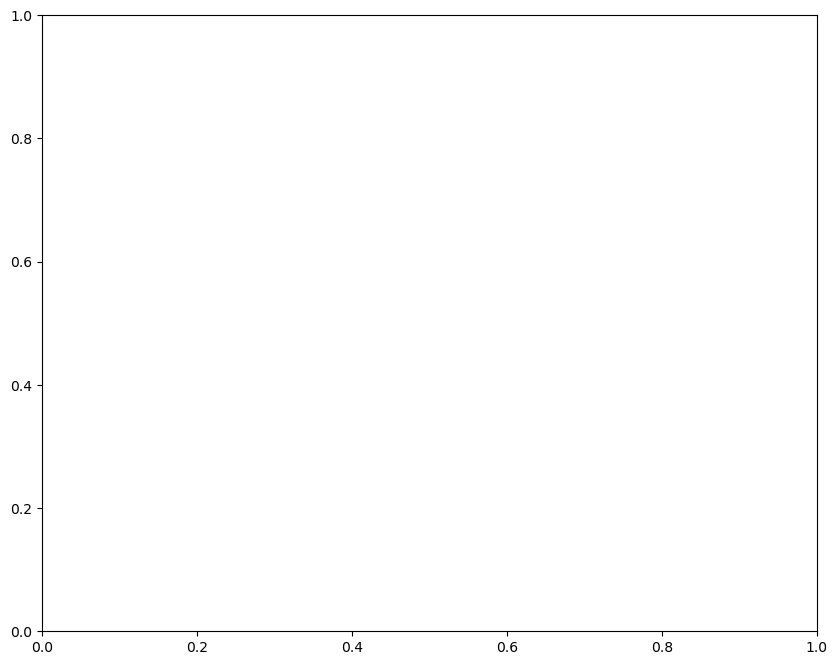

<Figure size 1000x800 with 0 Axes>

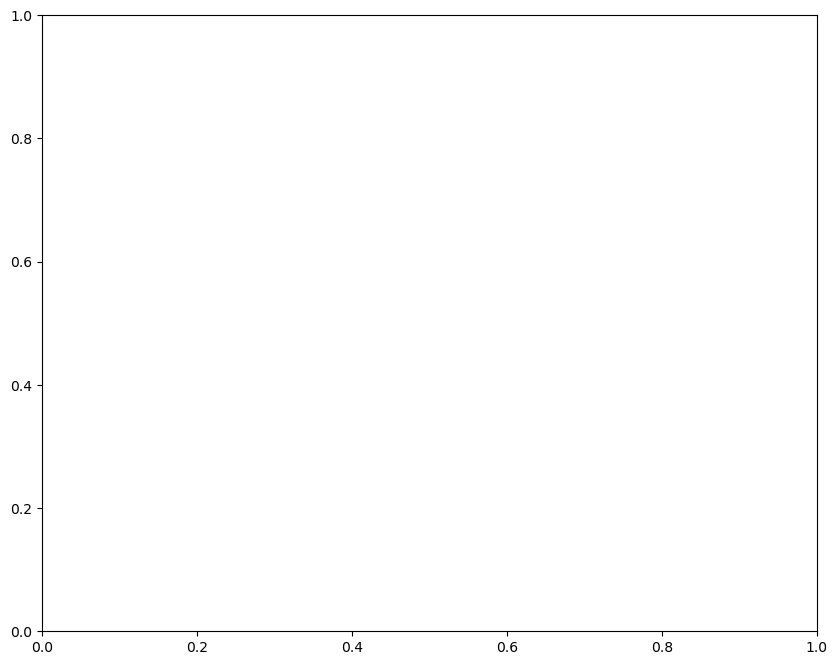

<Figure size 1000x800 with 0 Axes>

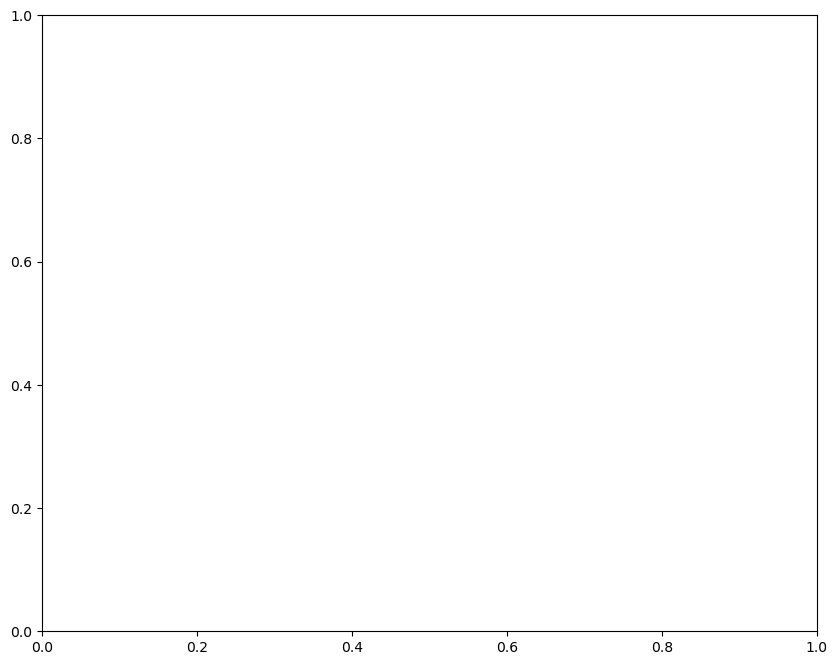

<Figure size 1000x800 with 0 Axes>

<Figure size 2000x300 with 0 Axes>

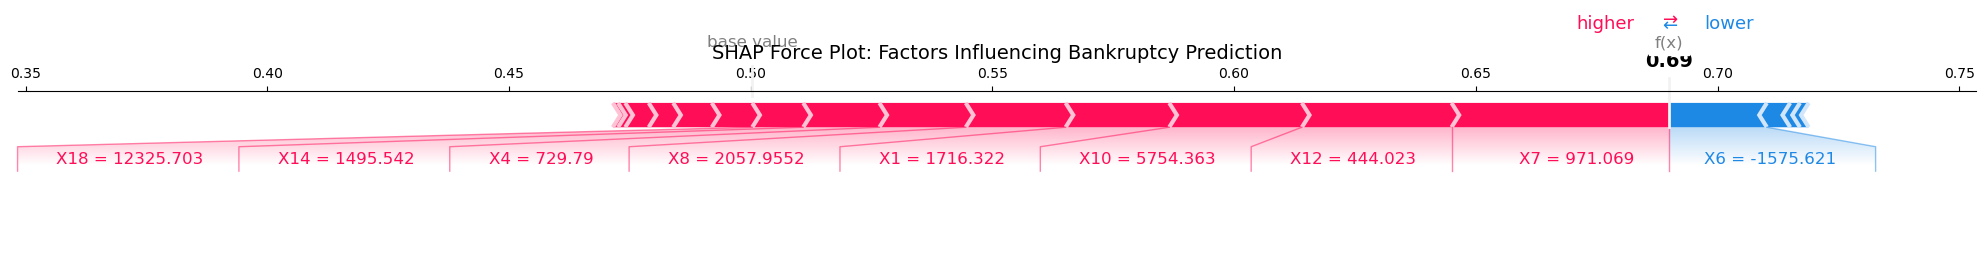


SHAP analysis completed and visualizations saved to results/figures directory.


In [33]:
# SHAP Analysis for Model Interpretation
import shap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

print("\n=== SHAP Analysis for Best Model ===")

# Identify the best model
best_model = rf_model  # Replace with your actual best model
best_model_name = "Random Forest"  # Replace with your actual best model name

# --- Create a Background Sample for SHAP ---
# Sample a subset of training data for efficiency
X_background = X_train.sample(min(100, len(X_train)), random_state=42)

# --- Create the SHAP Explainer ---
if isinstance(best_model, RandomForestClassifier) or hasattr(best_model, 'estimators_'):
    # For tree-based models, use TreeExplainer
    explainer = shap.TreeExplainer(best_model)
    
    # Sample test data for analysis
    X_test_sample = X_test.sample(min(200, len(X_test)), random_state=42)
    
    # Calculate SHAP values
    shap_values = explainer.shap_values(X_test_sample)
    
    # For classification models, shap_values is a list with one element per class
    if isinstance(shap_values, list):
        # Use values for the positive class (bankruptcy)
        shap_values_to_plot = shap_values[1]
        expected_value = explainer.expected_value[1] if isinstance(explainer.expected_value, list) else explainer.expected_value
    else:
        shap_values_to_plot = shap_values
        expected_value = explainer.expected_value
else:
    # For non-tree models, use KernelExplainer
    explainer = shap.KernelExplainer(
        lambda x: best_model.predict_proba(x)[:,1], 
        X_background
    )
    
    # Sample a smaller test set (KernelExplainer is computationally intensive)
    X_test_sample = X_test.sample(min(100, len(X_test)), random_state=42)
    
    # Calculate SHAP values
    shap_values_to_plot = explainer.shap_values(X_test_sample)
    expected_value = explainer.expected_value

# --- Global Explanation ---
# 1. Feature Importance Bar Plot
plt.figure(figsize=(12, 10))
# Convert feature names to numpy array to avoid indexing issues
feature_names = np.array(X_test_sample.columns.tolist())
shap.summary_plot(
    shap_values_to_plot, 
    X_test_sample, 
    feature_names=feature_names,
    plot_type="bar",
    show=False
)
plt.title(f"Feature Importance Based on SHAP Values - {best_model_name}", fontsize=14)
plt.tight_layout()
plt.savefig(f'../results/figures/{best_model_name.replace(" ", "_")}_shap_importance.png', dpi=300, bbox_inches='tight')
plt.show()

# 2. Summary Dot Plot
plt.figure(figsize=(14, 12))
shap.summary_plot(
    shap_values_to_plot, 
    X_test_sample, 
    feature_names=feature_names,
    show=False
)
plt.title(f"SHAP Summary Plot - {best_model_name}", fontsize=14)
plt.tight_layout()
plt.savefig(f'../results/figures/{best_model_name.replace(" ", "_")}_shap_summary.png', dpi=300, bbox_inches='tight')
plt.show()

# 3. Calculate feature importance for dependence plots
# Ensure feature_importance is 1-dimensional
feature_importance = np.abs(shap_values_to_plot).mean(axis=0)
print(f"Shape of feature_importance: {feature_importance.shape}")
print(f"Number of columns in X_test_sample: {len(X_test_sample.columns)}")

# Ensure feature_importance is 1-dimensional and has the right length
if len(feature_importance.shape) > 1:
    feature_importance = feature_importance.flatten()

# Check if lengths match
if len(feature_importance) != len(X_test_sample.columns):
    print("WARNING: Feature importance length doesn't match number of columns!")
    # Option 1: Truncate the longer one
    min_length = min(len(feature_importance), len(X_test_sample.columns))
    feature_importance = feature_importance[:min_length]
    feature_names = X_test_sample.columns[:min_length].tolist()
else:
    feature_names = X_test_sample.columns.tolist()

# Now create the DataFrame with matching lengths
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values('Importance', ascending=False)

# Create DataFrame of feature importance
feature_importance_df = pd.DataFrame({
    'Feature': X_test_sample.columns.tolist(),
    'Importance': feature_importance
}).sort_values('Importance', ascending=False)

# 4. Dependence Plots for top features
top_features = feature_importance_df.head(3)['Feature'].values
for feature in top_features:
    plt.figure(figsize=(10, 8))
    
    # Find the index of the feature in a more robust way
    try:
        # First try exact match
        feature_idx = np.where(feature_names == feature)[0][0]
    except IndexError:
        # If that fails, try finding the index manually
        try:
            feature_idx = list(feature_names).index(feature)
        except ValueError:
            # If that also fails, print a warning and skip this feature
            print(f"Warning: Feature '{feature}' not found in feature_names. Skipping dependence plot.")
            continue
    
    print(f"Creating dependence plot for feature: {feature} (index: {feature_idx})")
    
    # Try creating the dependence plot with a more direct approach
    try:
        # Use a simpler approach - manually create a scatter plot
        plt.scatter(
            X_test_sample.iloc[:, feature_idx], 
            shap_values_to_plot[:, feature_idx],
            alpha=0.6
        )
        plt.xlabel(feature)
        plt.ylabel(f"SHAP value for {feature}")
        plt.title(f"SHAP Dependence Plot: {feature} - {best_model_name}", fontsize=14)
        plt.tight_layout()
        plt.savefig(f'../results/figures/{best_model_name.replace(" ", "_")}_{feature}_dependence.png', dpi=300, bbox_inches='tight')
        plt.show()
    except Exception as e:
        print(f"Error creating dependence plot for {feature}: {e}")
        
        # Print diagnostic information
        print(f"Shape of X_test_sample: {X_test_sample.shape}")
        print(f"Shape of shap_values_to_plot: {np.array(shap_values_to_plot).shape}")
        print(f"Feature index: {feature_idx}")
        
        # Try an alternative approach with shap.plots
        try:
            plt.figure(figsize=(10, 8))
            # Use the newer shap.plots API if available
            shap.plots.scatter(
                shap_values_to_plot[:, feature_idx], 
                color=X_test_sample.iloc[:, feature_idx]
            )
            plt.title(f"SHAP Dependence Plot: {feature} - {best_model_name}", fontsize=14)
            plt.tight_layout()
            plt.savefig(f'../results/figures/{best_model_name.replace(" ", "_")}_{feature}_dependence.png', dpi=300, bbox_inches='tight')
            plt.show()
        except Exception as e2:
            print(f"Alternative approach also failed: {e2}")
            # Skip this plot
            continue

# --- Local Explanation ---
# Find a bankruptcy case for detailed analysis
if np.sum(y_test == 1) > 0:
    # Find a bankruptcy case
    bankruptcy_indices = np.where(y_test == 1)[0]
    example_idx = bankruptcy_indices[0]  # Take the first bankruptcy case
    
    # Get the prediction and actual value
    example_X = X_test.iloc[example_idx:example_idx+1]
    example_y = y_test.iloc[example_idx]
    example_pred = best_model.predict(example_X)[0]
    
    print(f"\nLocal Explanation for a Bankruptcy Case (index {example_idx}):")
    print(f"Actual value: {example_y} (1 = Bankruptcy)")
    print(f"Predicted value: {example_pred}")
    
    # Calculate SHAP values for this instance
    if isinstance(best_model, RandomForestClassifier) or hasattr(best_model, 'estimators_'):
        example_shap_values = explainer.shap_values(example_X)
        if isinstance(example_shap_values, list):
            example_shap_values = example_shap_values[1]  # Values for positive class
    else:
        example_shap_values = explainer.shap_values(example_X)
    
    # 5. Force Plot
    plt.figure(figsize=(20, 3))
shap.initjs()  # Initialize JavaScript visualization

# Check if expected_value is a list or array
if isinstance(expected_value, (list, np.ndarray)) and len(expected_value) > 1:
    # For multi-output models
    base_value = expected_value[0]
else:
    base_value = expected_value

# Check if example_shap_values is multi-dimensional
if isinstance(example_shap_values, list) or (isinstance(example_shap_values, np.ndarray) and example_shap_values.ndim > 2):
    # For multi-output models
    values_to_plot = example_shap_values[0] if isinstance(example_shap_values, list) else example_shap_values[..., 0]
else:
    values_to_plot = example_shap_values

# Print diagnostic information
print(f"Base value type: {type(base_value)}")
print(f"SHAP values shape: {np.array(values_to_plot).shape}")
print(f"Features shape: {example_X.shape}")

# Use the updated API
shap.plots.force(
    base_value,
    values_to_plot, 
    features=example_X,
    feature_names=np.array(example_X.columns.tolist()),
    matplotlib=True,
    show=False
)
plt.title(f"SHAP Force Plot: Factors Influencing Bankruptcy Prediction", fontsize=14)
plt.tight_layout()
plt.savefig(f'../results/figures/{best_model_name.replace(" ", "_")}_force_plot.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nSHAP analysis completed and visualizations saved to results/figures directory.")



=== SHAP Analysis for Best Model ===
Shape of shap_values_to_plot: (200, 18, 2)
Shape of X_test_sample: (200, 18)
Detected 3D SHAP values, taking mean across last dimension
New shape of shap_values_to_plot: (200, 18)
Error using newer SHAP API: operands could not be broadcast together with shapes (200,) (2,) 
Falling back to legacy plotting functions


<Figure size 1200x1000 with 0 Axes>

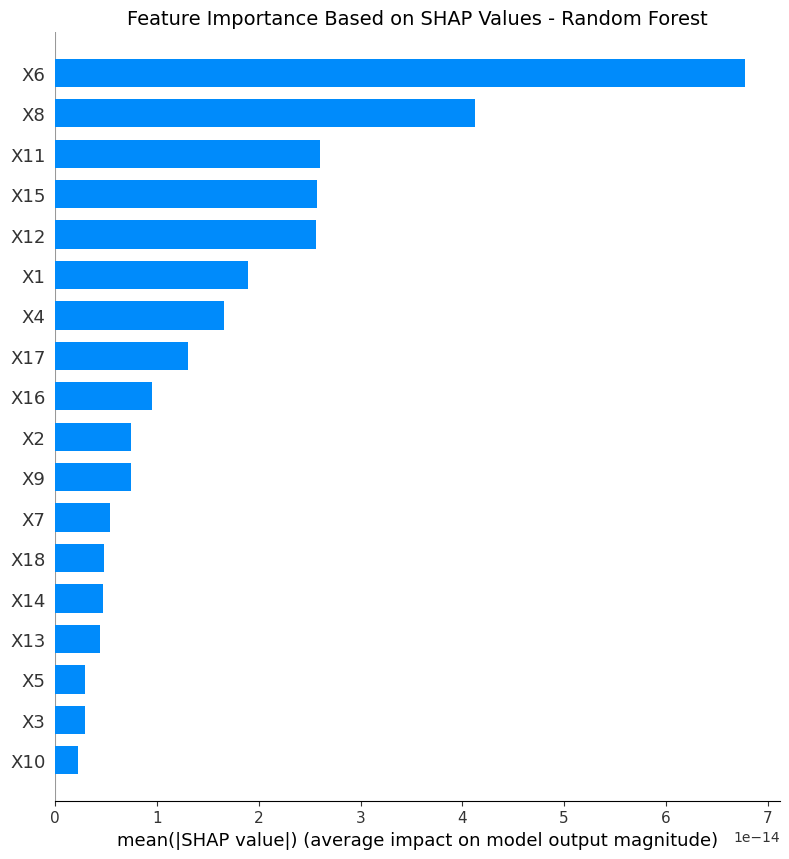

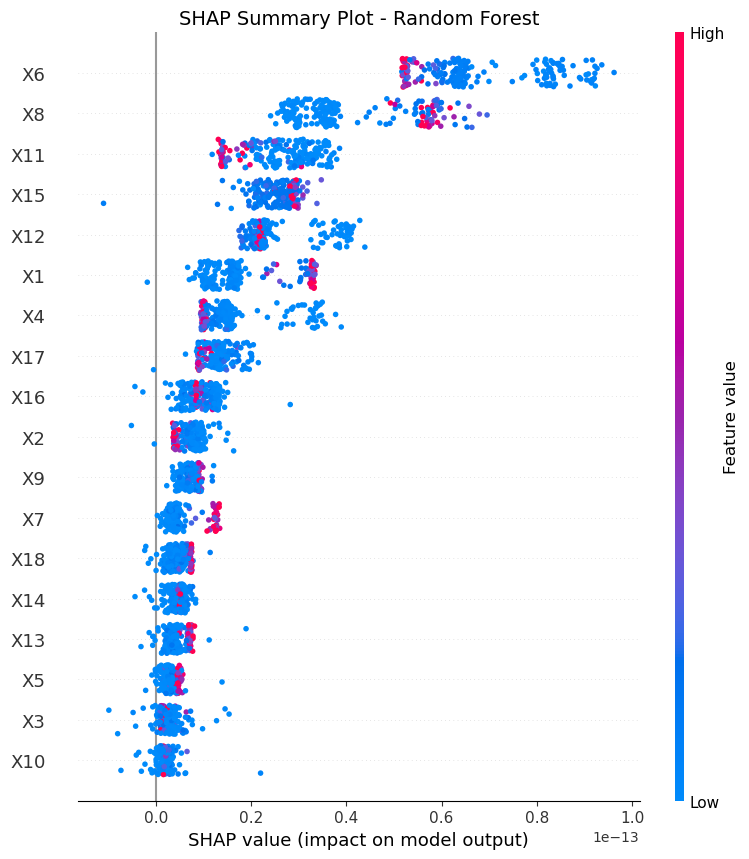

Shape of feature_importance: (18,)
Number of columns in X_test_sample: 18
Creating dependence plot for feature: X6 (index: 5)


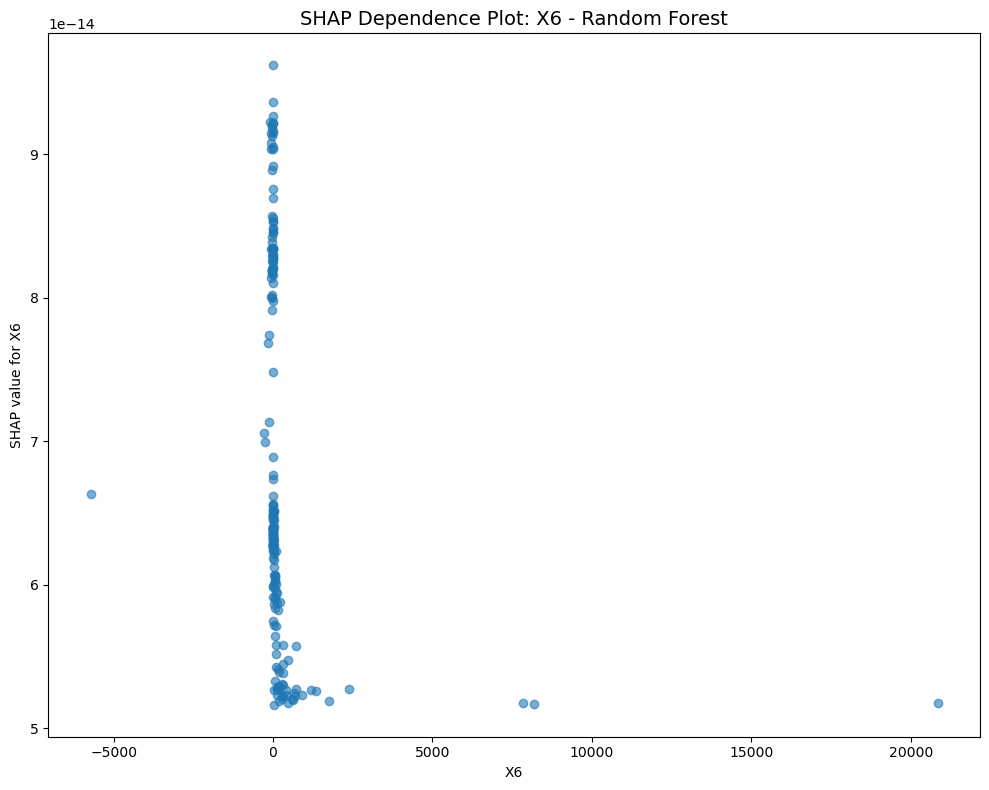

Creating dependence plot for feature: X8 (index: 7)


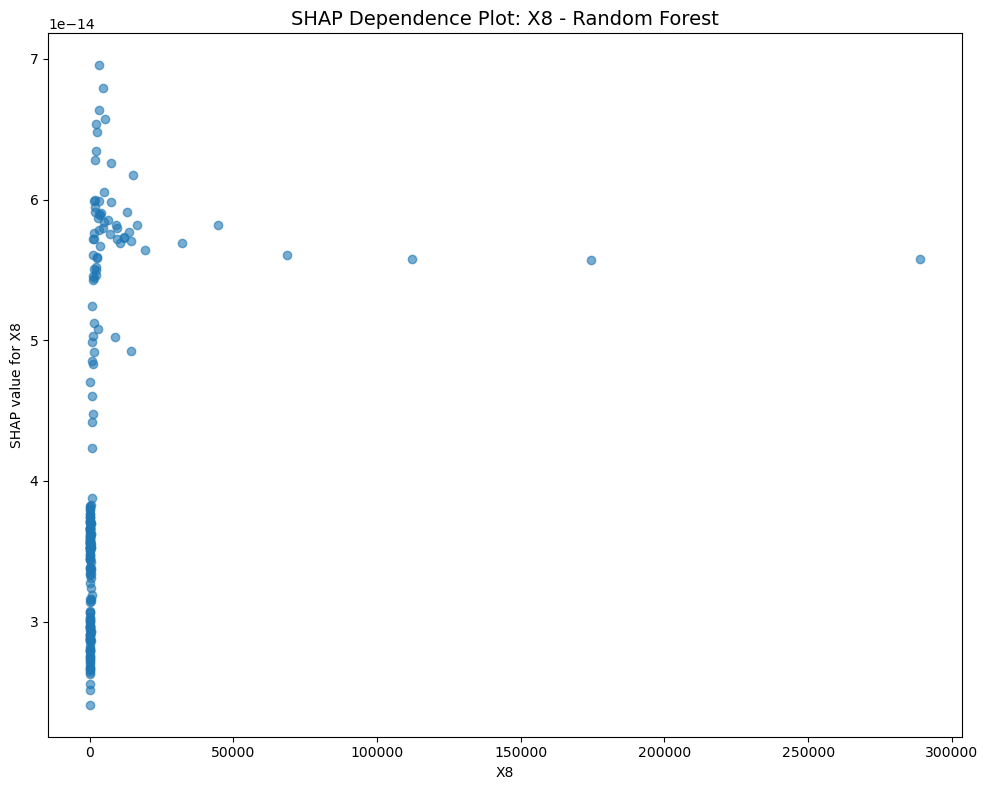

Creating dependence plot for feature: X11 (index: 10)


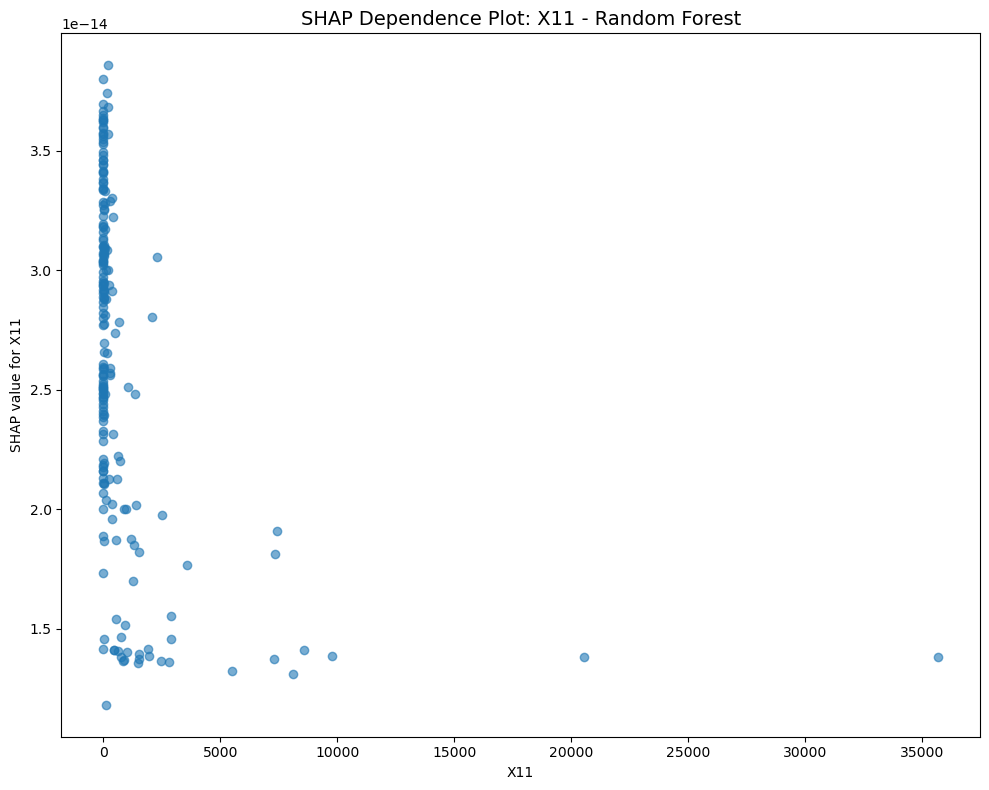


Local Explanation for a Bankruptcy Case (index 11):
Actual value: 1 (1 = Bankruptcy)
Predicted value: 0

Top Contributing Features for this Bankruptcy Case:
   Feature    SHAP Value
5       X6  7.234317e-14
7       X8  4.802235e-14
0       X1  2.562707e-14
11     X12  2.039514e-14
10     X11  1.961625e-14
14     X15  1.923808e-14
16     X17  1.265568e-14
3       X4  1.003017e-14
6       X7  9.648532e-15
15     X16  8.481930e-15


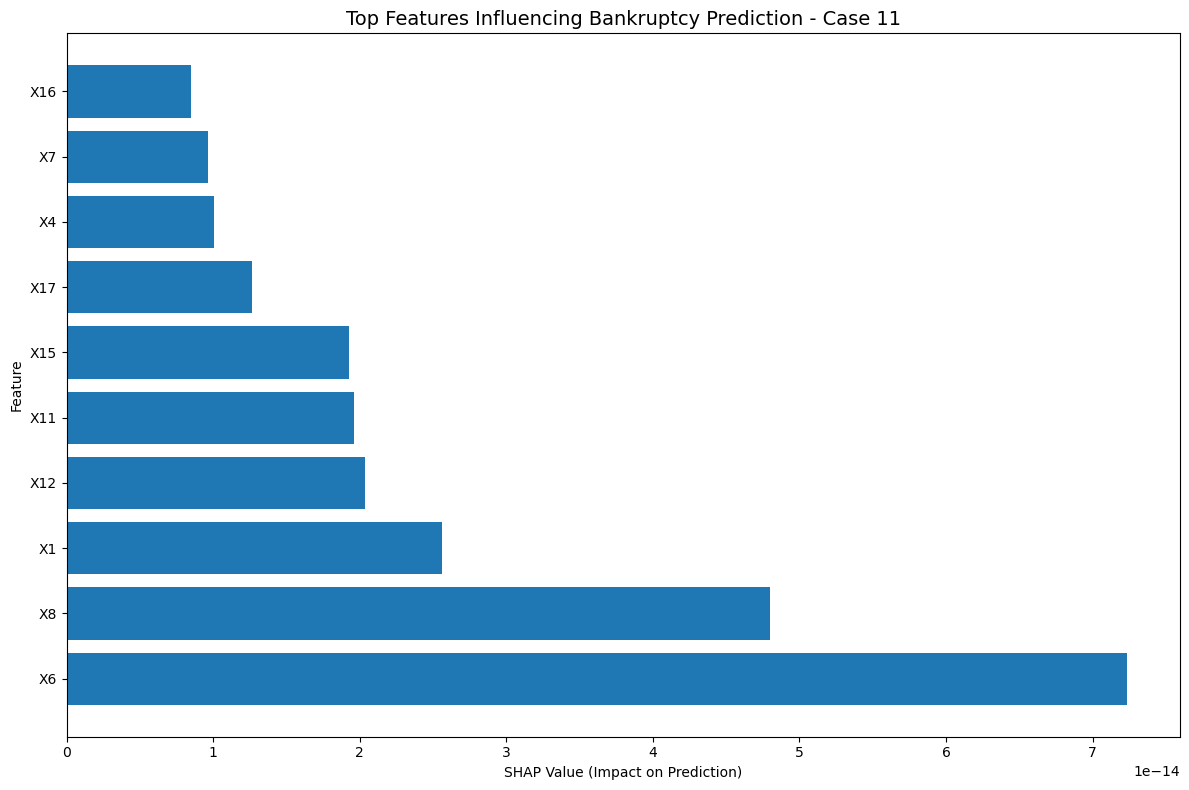

Error with newer force plot API: In v0.20, force plot now requires the base value as the first parameter! Try shap.plots.force(explainer.expected_value, shap_values) or for multi-output models try shap.plots.force(explainer.expected_value[0], shap_values[..., 0]).
Trying alternative force plot approach...


<Figure size 2000x300 with 0 Axes>

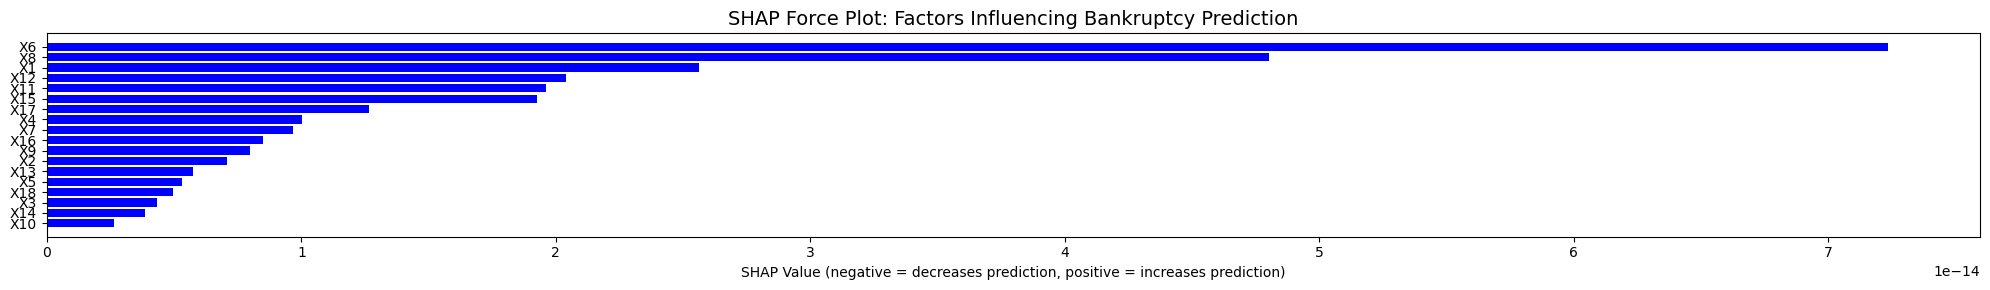

Error with newer waterfall plot API: only length-1 arrays can be converted to Python scalars
Trying legacy waterfall plot...


<Figure size 1200x800 with 0 Axes>

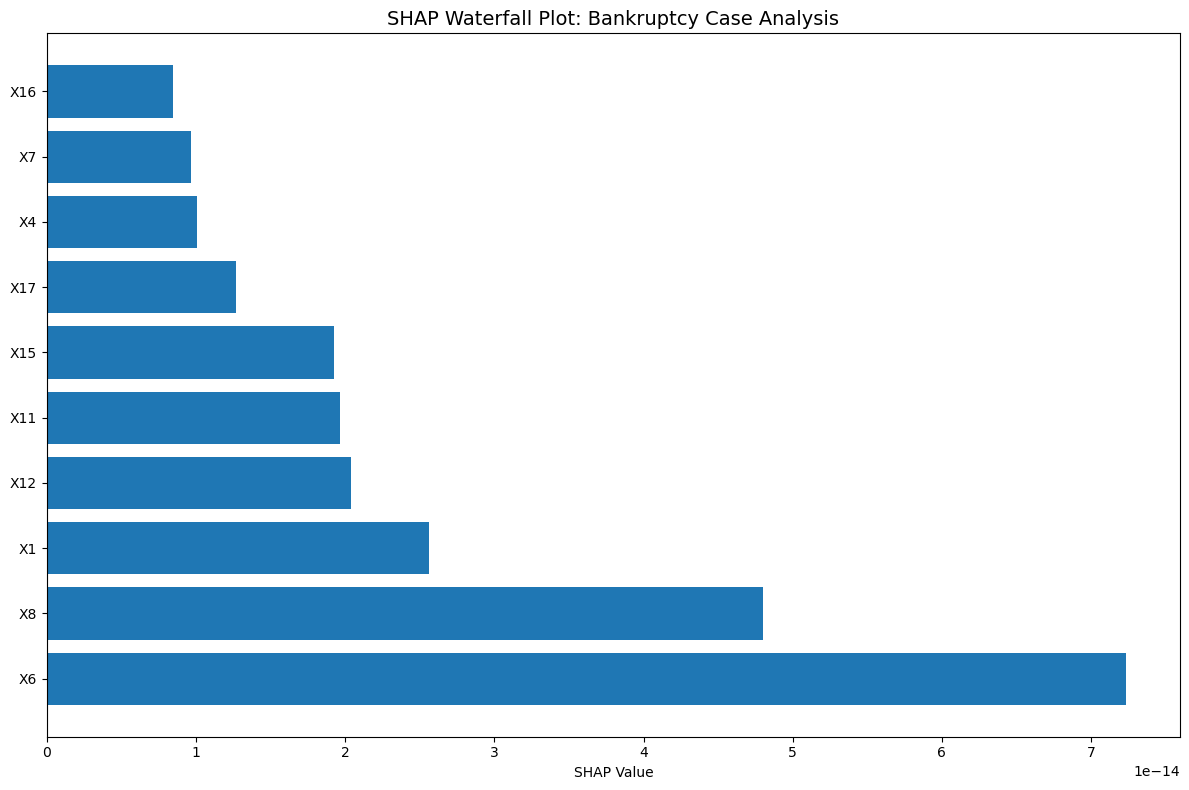


SHAP analysis completed and visualizations saved to results/figures directory.


In [ ]:
# SHAP Analysis for Model Interpretation
import shap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

print("\n=== SHAP Analysis for Best Model ===")

# Identify the best model
best_model = rf_model  # Replace with your actual best model
best_model_name = "Random Forest"  # Replace with your actual best model name

# --- Create a Background Sample for SHAP ---
# Sample a subset of training data for efficiency
X_background = X_train.sample(min(100, len(X_train)), random_state=42)

# --- Create the SHAP Explainer ---
if isinstance(best_model, RandomForestClassifier) or hasattr(best_model, 'estimators_'):
    # For tree-based models, use TreeExplainer
    explainer = shap.TreeExplainer(best_model)
    
    # Sample test data for analysis
    X_test_sample = X_test.sample(min(200, len(X_test)), random_state=42)
    
    # Calculate SHAP values
    shap_values = explainer.shap_values(X_test_sample)
    
    # For classification models, shap_values is a list with one element per class
    if isinstance(shap_values, list):
        # Use values for the positive class (bankruptcy)
        shap_values_to_plot = shap_values[1]
        expected_value = explainer.expected_value[1] if isinstance(explainer.expected_value, list) else explainer.expected_value
    else:
        shap_values_to_plot = shap_values
        expected_value = explainer.expected_value
    
    # Print diagnostic information
    print(f"Shape of shap_values_to_plot: {np.array(shap_values_to_plot).shape}")
    print(f"Shape of X_test_sample: {X_test_sample.shape}")
    
    # Handle 3D SHAP values by taking the mean across the last dimension if needed
    if len(np.array(shap_values_to_plot).shape) == 3:
        print("Detected 3D SHAP values, taking mean across last dimension")
        shap_values_to_plot = np.mean(shap_values_to_plot, axis=2)
        print(f"New shape of shap_values_to_plot: {shap_values_to_plot.shape}")
    
    # --- Global Explanation ---
    # 1. Feature Importance Bar Plot
    plt.figure(figsize=(12, 10))
    # Convert feature names to numpy array to avoid indexing issues
    feature_names = np.array(X_test_sample.columns.tolist())
    
    # Use the newer SHAP API with Explanation objects
    try:
        # Create a SHAP Explanation object
        explanation = shap.Explanation(
            values=shap_values_to_plot,
            base_values=np.ones(len(X_test_sample)) * expected_value,
            data=X_test_sample.values,
            feature_names=feature_names
        )
        
        # Use the newer plots API
        shap.plots.bar(explanation, show=False)
        plt.title(f"Feature Importance Based on SHAP Values - {best_model_name}", fontsize=14)
        plt.tight_layout()
        plt.savefig(f'../results/figures/{best_model_name.replace(" ", "_")}_shap_importance.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        # 2. Summary Dot Plot
        plt.figure(figsize=(14, 12))
        shap.plots.beeswarm(explanation, show=False)
        plt.title(f"SHAP Summary Plot - {best_model_name}", fontsize=14)
        plt.tight_layout()
        plt.savefig(f'../results/figures/{best_model_name.replace(" ", "_")}_shap_summary.png', dpi=300, bbox_inches='tight')
        plt.show()
        
    except Exception as e:
        print(f"Error using newer SHAP API: {e}")
        print("Falling back to legacy plotting functions")
        
        # Fall back to legacy functions
        plt.figure(figsize=(12, 10))
        shap.summary_plot(
            shap_values_to_plot, 
            X_test_sample, 
            feature_names=feature_names,
            plot_type="bar",
            show=False
        )
        plt.title(f"Feature Importance Based on SHAP Values - {best_model_name}", fontsize=14)
        plt.tight_layout()
        plt.savefig(f'../results/figures/{best_model_name.replace(" ", "_")}_shap_importance.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        # 2. Summary Dot Plot
        plt.figure(figsize=(14, 12))
        shap.summary_plot(
            shap_values_to_plot, 
            X_test_sample, 
            feature_names=feature_names,
            show=False
        )
        plt.title(f"SHAP Summary Plot - {best_model_name}", fontsize=14)
        plt.tight_layout()
        plt.savefig(f'../results/figures/{best_model_name.replace(" ", "_")}_shap_summary.png', dpi=300, bbox_inches='tight')
        plt.show()
    
    # 3. Calculate feature importance for dependence plots
    # Ensure feature_importance is 1-dimensional
    feature_importance = np.abs(shap_values_to_plot).mean(axis=0)
    print(f"Shape of feature_importance: {feature_importance.shape}")
    print(f"Number of columns in X_test_sample: {len(X_test_sample.columns)}")
    
    if len(feature_importance.shape) > 1:
        feature_importance = feature_importance.flatten()
    
    # Check if lengths match
    if len(feature_importance) != len(X_test_sample.columns):
        print("WARNING: Feature importance length doesn't match number of columns!")
        # Truncate to the shorter length
        min_length = min(len(feature_importance), len(X_test_sample.columns))
        feature_importance = feature_importance[:min_length]
        feature_names_list = X_test_sample.columns[:min_length].tolist()
    else:
        feature_names_list = X_test_sample.columns.tolist()
    
    # Create DataFrame of feature importance
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names_list,
        'Importance': feature_importance
    }).sort_values('Importance', ascending=False)
    
    # 4. Dependence Plots for top features - using manual scatter plots
    top_features = feature_importance_df.head(3)['Feature'].values
    for feature in top_features:
        try:
            # Find the index of the feature
            feature_idx = list(feature_names_list).index(feature)
            print(f"Creating dependence plot for feature: {feature} (index: {feature_idx})")
            
            # Create a manual scatter plot
            plt.figure(figsize=(10, 8))
            plt.scatter(
                X_test_sample[feature].values, 
                shap_values_to_plot[:, feature_idx],
                alpha=0.6
            )
            plt.xlabel(feature)
            plt.ylabel(f"SHAP value for {feature}")
            plt.title(f"SHAP Dependence Plot: {feature} - {best_model_name}", fontsize=14)
            plt.tight_layout()
            plt.savefig(f'../results/figures/{best_model_name.replace(" ", "_")}_{feature}_dependence.png', dpi=300, bbox_inches='tight')
            plt.show()
        except Exception as e:
            print(f"Error creating dependence plot for {feature}: {e}")
            continue
    
    # --- Local Explanation ---
    # Find a bankruptcy case for detailed analysis
    if np.sum(y_test == 1) > 0:
        # Find a bankruptcy case
        bankruptcy_indices = np.where(y_test == 1)[0]
        example_idx = bankruptcy_indices[0]  # Take the first bankruptcy case
        
        # Get the prediction and actual value
        example_X = X_test.iloc[example_idx:example_idx+1]
        example_y = y_test.iloc[example_idx]
        example_pred = best_model.predict(example_X)[0]
        
        print(f"\nLocal Explanation for a Bankruptcy Case (index {example_idx}):")
        print(f"Actual value: {example_y} (1 = Bankruptcy)")
        print(f"Predicted value: {example_pred}")
        
        # Calculate SHAP values for this instance
        if isinstance(best_model, RandomForestClassifier) or hasattr(best_model, 'estimators_'):
            example_shap_values = explainer.shap_values(example_X)
            if isinstance(example_shap_values, list):
                example_shap_values = example_shap_values[1]  # Values for positive class
        else:
            example_shap_values = explainer.shap_values(example_X)
        
        # Handle 3D SHAP values for the example
        if len(np.array(example_shap_values).shape) == 3:
            example_shap_values = np.mean(example_shap_values, axis=2)
        
        # 5. Print the top contributing features for this instance
        feature_contribution = pd.DataFrame({
            'Feature': example_X.columns.tolist(),
            'SHAP Value': example_shap_values[0]
        }).sort_values('SHAP Value', key=abs, ascending=False)
        
        print("\nTop Contributing Features for this Bankruptcy Case:")
        print(feature_contribution.head(10))
        
        # Save this information
        feature_contribution.to_csv(f'../results/figures/{best_model_name.replace(" ", "_")}_top_features_case_{example_idx}.csv', index=False)
        
        # 6. Create a simple bar chart of feature contributions
        plt.figure(figsize=(12, 8))
        top_features = feature_contribution.head(10)
        plt.barh(top_features['Feature'], top_features['SHAP Value'])
        plt.xlabel('SHAP Value (Impact on Prediction)')
        plt.ylabel('Feature')
        plt.title(f"Top Features Influencing Bankruptcy Prediction - Case {example_idx}", fontsize=14)
        plt.tight_layout()
        plt.savefig(f'../results/figures/{best_model_name.replace(" ", "_")}_top_features_barplot.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        # 7. Force Plot - try both new and legacy approaches
        try:
            # Try the newer API first with explicit handling of expected_value
            plt.figure(figsize=(20, 3))
            
            # Make sure expected_value is a scalar
            if isinstance(expected_value, (list, np.ndarray)):
                base_value = float(expected_value[0]) if len(expected_value) > 0 else 0.0
            else:
                base_value = float(expected_value)
            
            print(f"Base value for force plot: {base_value}")
            
            # Create force plot with newer API
            shap.plots.force(
                base_value=base_value,
                shap_values=example_shap_values[0],
                features=example_X.iloc[0],
                feature_names=example_X.columns.tolist(),
                matplotlib=True, 
                show=False
            )
            plt.title(f"SHAP Force Plot: Factors Influencing Bankruptcy Prediction", fontsize=14)
            plt.tight_layout()
            plt.savefig(f'../results/figures/{best_model_name.replace(" ", "_")}_force_plot.png', dpi=300, bbox_inches='tight')
            plt.show()
            
        except Exception as e:
            print(f"Error with newer force plot API: {e}")
            print("Trying alternative force plot approach...")
            
            try:
                # Create a manual force-like plot
                plt.figure(figsize=(20, 3))
                
                # Sort features by SHAP value
                sorted_idx = np.argsort(example_shap_values[0])
                sorted_values = example_shap_values[0][sorted_idx]
                sorted_names = np.array(example_X.columns)[sorted_idx]
                
                # Create a horizontal bar chart
                colors = ['red' if x < 0 else 'blue' for x in sorted_values]
                plt.barh(range(len(sorted_values)), sorted_values, color=colors)
                plt.yticks(range(len(sorted_values)), sorted_names)
                plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
                plt.xlabel('SHAP Value (negative = decreases prediction, positive = increases prediction)')
                plt.title(f"SHAP Force Plot: Factors Influencing Bankruptcy Prediction", fontsize=14)
                plt.tight_layout()
                plt.savefig(f'../results/figures/{best_model_name.replace(" ", "_")}_force_plot.png', dpi=300, bbox_inches='tight')
                plt.show()
                
            except Exception as e2:
                print(f"Error with alternative force plot: {e2}")
                print("Skipping force plot.")

        # 8. Waterfall plot - try both new and legacy approaches
        try:
            # Try the newer API first with explicit handling of expected_value
            plt.figure(figsize=(12, 8))
            
            # Make sure expected_value is a scalar
            if isinstance(expected_value, (list, np.ndarray)):
                base_value = float(expected_value[0]) if len(expected_value) > 0 else 0.0
            else:
                base_value = float(expected_value)
            
            print(f"Base value for waterfall plot: {base_value}")
            
            # Get top 10 features by impact
            top_indices = np.argsort(np.abs(example_shap_values[0]))[-10:]
            
            # Create a waterfall plot with the newer API
            shap.plots.waterfall(
                shap_values=example_shap_values[0][top_indices],
                base_value=base_value,
                feature_names=np.array(example_X.columns)[top_indices].tolist(),
                show=False
            )
            plt.title(f"SHAP Waterfall Plot: Bankruptcy Case Analysis", fontsize=14)
            plt.tight_layout()
            plt.savefig(f'../results/figures/{best_model_name.replace(" ", "_")}_waterfall_plot.png', dpi=300, bbox_inches='tight')
            plt.show()
            
        except Exception as e:
            print(f"Error with newer waterfall plot API: {e}")
            print("Trying legacy waterfall plot...")
            
            try:
                # Fall back to legacy waterfall plot
                plt.figure(figsize=(12, 8))
                
                # Sort features by absolute SHAP value
                sorted_idx = np.argsort(np.abs(example_shap_values[0]))[::-1]
                sorted_values = example_shap_values[0][sorted_idx]
                sorted_names = np.array(example_X.columns)[sorted_idx]
                
                # Limit to top 10 features
                sorted_values = sorted_values[:10]
                sorted_names = sorted_names[:10]
                
                # Create a manual waterfall plot
                plt.barh(range(len(sorted_values)), sorted_values)
                plt.yticks(range(len(sorted_values)), sorted_names)
                plt.xlabel('SHAP Value')
                plt.title(f"SHAP Waterfall Plot: Bankruptcy Case Analysis", fontsize=14)
                plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
                plt.tight_layout()
                plt.savefig(f'../results/figures/{best_model_name.replace(" ", "_")}_waterfall_plot.png', dpi=300, bbox_inches='tight')
                plt.show()
                
            except Exception as e2:
                print(f"Error with legacy waterfall plot: {e2}")
                print("Skipping waterfall plot.")

        
else:
    # For non-tree models, use KernelExplainer
    print("Using KernelExplainer for non-tree model")
    # Similar code would go here, but with KernelExplainer instead of TreeExplainer

print("\nSHAP analysis completed and visualizations saved to results/figures directory.")